# Домашнее задание №1

Темы "Введение в МатСтат" и "Виды статистических оценок и характеристики"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1. Посчитайте кол-во уникальных жанров. (1 балл)
2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме `type`. (1 балл)
3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам `genre`. (1 балл)
4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам `genre` и типу аниме `type`. (1 балл)
5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)
6. Сколько в среднем эпизодов приходится на аниме типа == `TV`? (1 балл)
7. По правилу трех сигм на столбцах `episodes`, `rating` и `members` оцените кол-во аномалий. (1 балл)
  - если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным
8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)
9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме `type`. (1 балл)
10. Оцените и визуализируйте корреляцию длины названия аниме `name` с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)



In [351]:
import numpy as np
import pandas as pd

# Не обязательно, можно использовать любую удобную вам библиотеку для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

plt.style.use('ggplot')
%matplotlib inline

BINS = 20
RANDOM_STATE = 1024

In [352]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  1450k      0 --:--:-- --:--:-- --:--:-- 1450k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [353]:
df = pd.read_csv('anime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [354]:
df.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

## 1. Посчитайте кол-во уникальных жанров. (1 балл)

Порежем названия жанров по разделителю ",":

In [355]:
genres = df['genre'].str.split(',').explode()
genres.head()

0            Drama
0          Romance
0           School
0     Supernatural
1           Action
Name: genre, dtype: object

Посмотрим на уникальные значения:

In [356]:
genres.unique()

array(['Drama', ' Romance', ' School', ' Supernatural', 'Action',
       ' Adventure', ' Drama', ' Fantasy', ' Magic', ' Military',
       ' Shounen', ' Comedy', ' Historical', ' Parody', ' Samurai',
       ' Sci-Fi', 'Sci-Fi', ' Thriller', 'Comedy', ' Sports',
       ' Super Power', ' Space', ' Slice of Life', ' Mecha', 'Adventure',
       ' Music', ' Mystery', ' Seinen', 'Fantasy', ' Martial Arts',
       ' Vampire', ' Shoujo', ' Horror', ' Police', ' Psychological',
       'Mystery', 'Psychological', ' Demons', ' Josei', 'Josei',
       'Military', 'Romance', ' Shounen Ai', ' Game', 'Demons',
       'Dementia', ' Harem', 'Music', 'Game', ' Cars', ' Dementia',
       'Cars', 'Mecha', 'Horror', 'School', ' Kids', 'Historical', 'Kids',
       ' Shoujo Ai', 'Shounen', 'Shoujo', 'Magic', 'Harem',
       'Martial Arts', 'Sports', 'Slice of Life', 'Seinen', nan, 'Parody',
       'Police', 'Thriller', 'Supernatural', 'Samurai', 'Super Power',
       'Vampire', 'Space'], dtype=object)

Видим дубликаты из-за пробелов в начале и в конце элементов. Также видим `nan`. Исправим:

In [357]:
genres = genres.str.strip()
genres = genres.dropna()
genres.unique()

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports',
       'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Josei', 'Shounen Ai', 'Game',
       'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai'], dtype=object)

Выглядит правдоподобно. Посчитаем:

In [358]:
genres_count = len(genres.unique())
genres_count

39

Найдено 39 уникальных жанров.

## 2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме type. (1 балл)

Посчитаем средний рейтинг и стандартное отклонение по типу аниме:

In [359]:
rating_by_types = df.groupby(by='type')['rating'].agg(['mean', 'std'])
rating_by_types.head()

mean       std
type                       
Movie    6.311996  1.213470
Music    5.584259  0.956994
ONA      5.633297  1.131859
OVA      6.474058  0.925699
Special  6.523434  0.913829

Визуализируем:

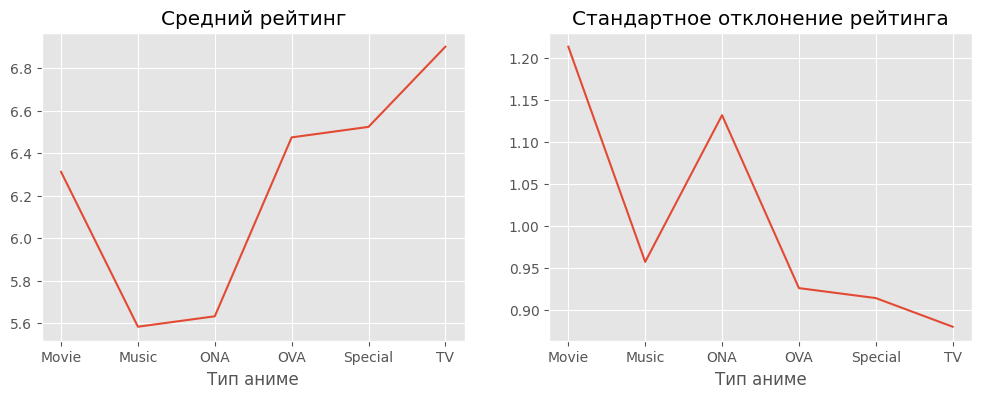

In [360]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

rating_by_types['mean'].plot(title='Средний рейтинг', xlabel='Тип аниме', ax=ax[0])
rating_by_types['std'].plot(title='Стандартное отклонение рейтинга', xlabel='Тип аниме', ax=ax[1])
plt.show()

## 3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам. (1 балл)
График постройте для топ-15 жанров по рейтингу

Разобьем списки жанров:

In [361]:
df_splitted_genres = df.copy()

In [362]:
df_splitted_genres['genre'] = df_splitted_genres['genre'].str.split(',')

In [363]:
df_splitted_genres = df_splitted_genres.explode('genre')

In [364]:
df_splitted_genres['genre'] = df_splitted_genres['genre'].str.strip()

In [365]:
df_splitted_genres.head()

anime_id                              name         genre   type episodes  \
0     32281                    Kimi no Na wa.         Drama  Movie        1   
0     32281                    Kimi no Na wa.       Romance  Movie        1   
0     32281                    Kimi no Na wa.        School  Movie        1   
0     32281                    Kimi no Na wa.  Supernatural  Movie        1   
1      5114  Fullmetal Alchemist: Brotherhood        Action     TV       64   

   rating  members  
0    9.37   200630  
0    9.37   200630  
0    9.37   200630  
0    9.37   200630  
1    9.26   793665

Посчитаем средний рейтинг и стандартное отклонение по жанрам:

In [366]:
rating_by_genres = df_splitted_genres.groupby(by='genre')['rating'].agg(['mean', 'std'])
rating_by_genres.head()

mean       std
genre                        
Action     6.808614  0.946312
Adventure  6.747665  0.877990
Cars       6.468611  1.179227
Comedy     6.622348  1.021482
Dementia   4.991617  1.160162

Визуализируем:

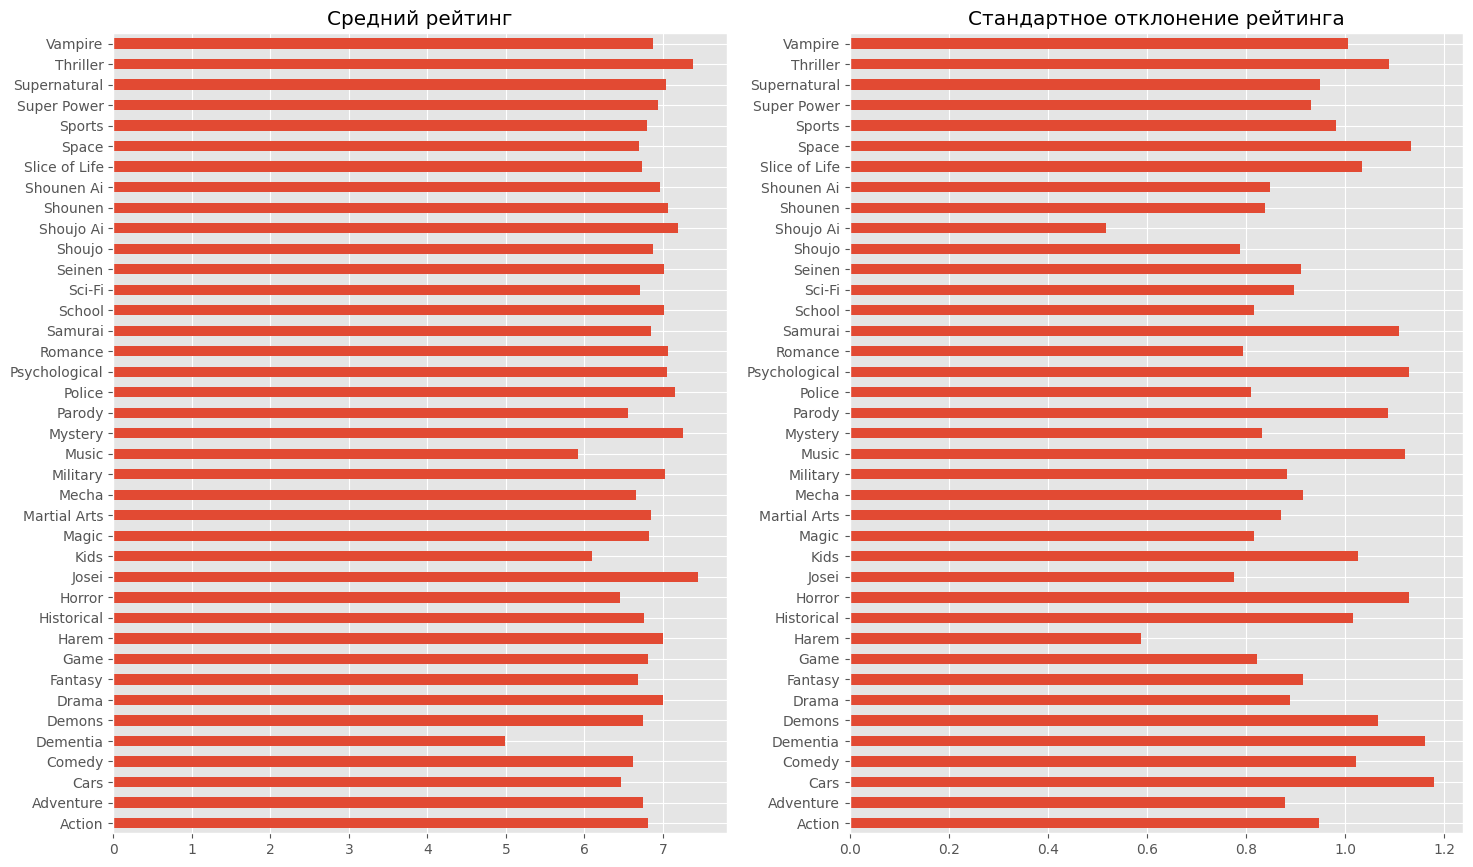

In [367]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

rating_by_genres['mean'].plot(kind='barh', title='Средний рейтинг', ylabel='', ax=ax[0])
rating_by_genres['std'].plot(kind='barh', title='Стандартное отклонение рейтинга', ylabel='', ax=ax[1])
plt.subplots_adjust(bottom=0, right=0.8, top=2)
plt.show()

## 4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам genre и типу аниме type. (1 балл)

Посчитаем квартили рейтинга по жанрам:

In [368]:
q1_by_genres = df_splitted_genres.groupby(by='genre')['rating'].quantile(0.25)
q2_by_genres = df_splitted_genres.groupby(by='genre')['rating'].quantile(0.5)
q3_by_genres = df_splitted_genres.groupby(by='genre')['rating'].quantile(0.75)

q1_by_genres, q2_by_genres, q3_by_genres

(genre
 Action           6.3000
 Adventure        6.3100
 Cars             5.5700
 Comedy           6.0600
 Dementia         4.2150
 Demons           6.2100
 Drama            6.4300
 Fantasy          6.1500
 Game             6.3650
 Harem            6.5875
 Historical       6.2100
 Horror           5.8300
 Josei            6.9100
 Kids             5.4500
 Magic            6.3600
 Martial Arts     6.2800
 Mecha            6.2400
 Military         6.5200
 Music            5.1600
 Mystery          6.7125
 Parody           5.9000
 Police           6.6900
 Psychological    6.1700
 Romance          6.5800
 Samurai          6.1550
 School           6.5100
 Sci-Fi           6.2200
 Seinen           6.4175
 Shoujo           6.3900
 Shoujo Ai        6.8200
 Shounen          6.6700
 Shounen Ai       6.4400
 Slice of Life    6.1300
 Space            6.1750
 Sports           6.3100
 Super Power      6.3575
 Supernatural     6.4600
 Thriller         6.5400
 Vampire          6.4000
 Name: rating, dty

Визуализируем:

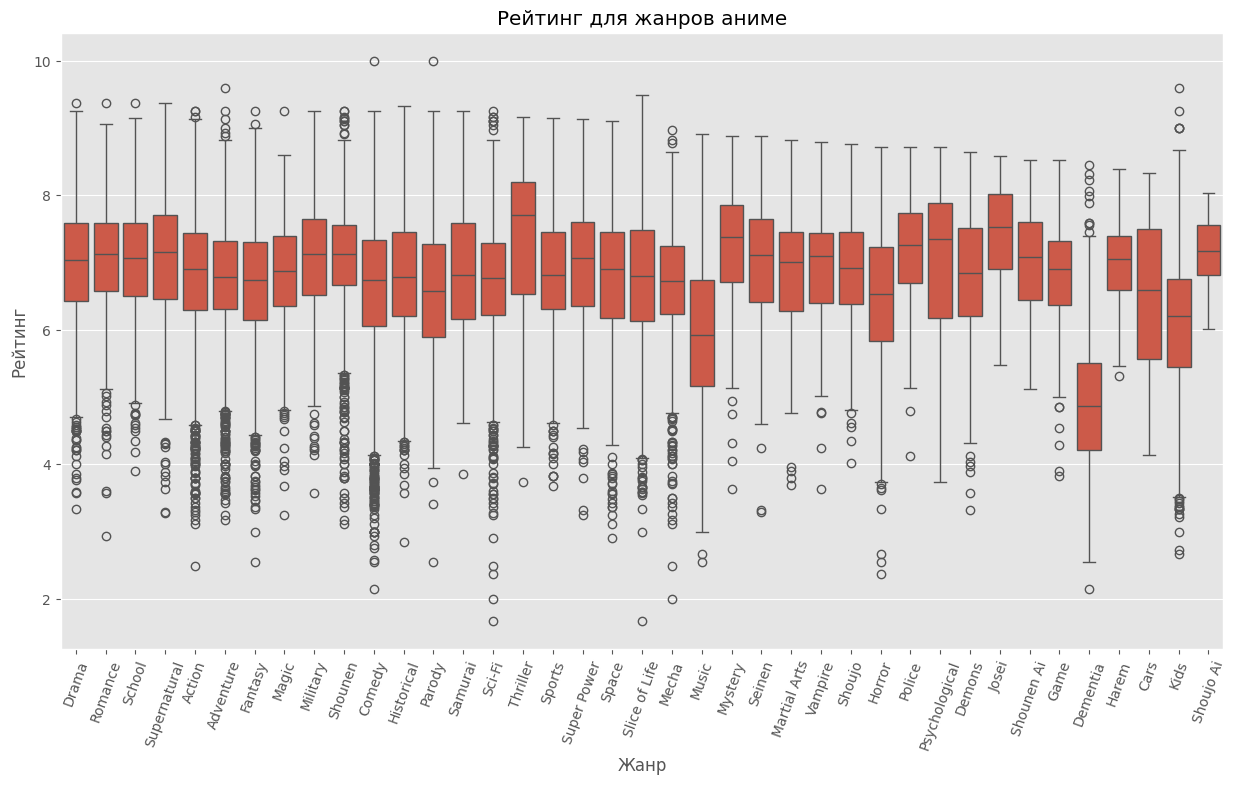

In [369]:
df_splitted_genres.reset_index(drop=True, inplace=True)
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
plt.title('Рейтинг для жанров аниме')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
sns.boxplot(data=df_splitted_genres, x='genre', y='rating')
plt.show()

Посчитаем квартили рейтинга по типам:

In [370]:
q1_by_types = df.groupby(by='type')['rating'].quantile(0.25)
q2_by_types = df.groupby(by='type')['rating'].quantile(0.5)
q3_by_types = df.groupby(by='type')['rating'].quantile(0.75)

q1_by_types, q2_by_types, q3_by_types

(type
 Movie      5.40
 Music      5.01
 ONA        4.86
 OVA        5.89
 Special    6.05
 TV         6.43
 Name: rating, dtype: float64,
 type
 Movie      6.450
 Music      5.615
 ONA        5.750
 OVA        6.460
 Special    6.630
 TV         6.940
 Name: rating, dtype: float64,
 type
 Movie      7.25
 Music      6.15
 ONA        6.41
 OVA        7.11
 Special    7.14
 TV         7.47
 Name: rating, dtype: float64)

Визуализируем:

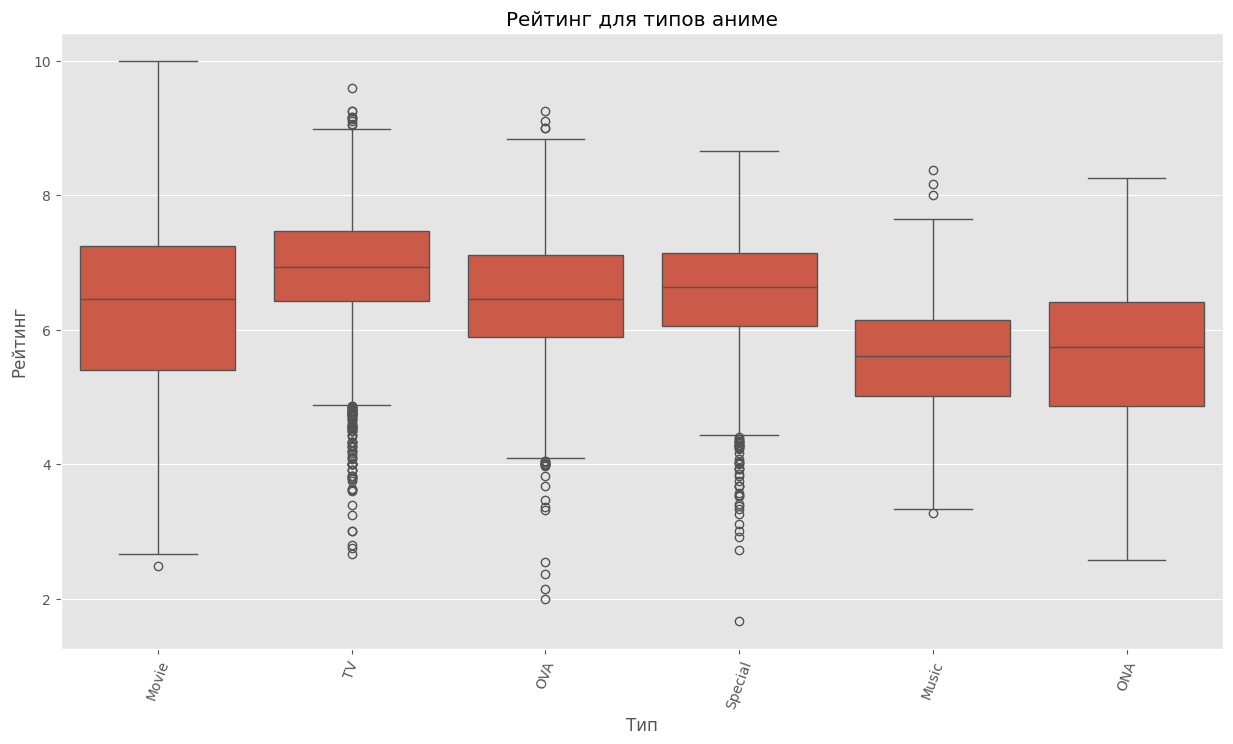

In [371]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
plt.title('Рейтинг для типов аниме')
plt.xlabel('Тип')
plt.ylabel('Рейтинг')
sns.boxplot(data=df, x='type', y='rating')
plt.show()

## 5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)

Посчитаем количество жанров для каждого аниме:

In [372]:
genres_count = df_splitted_genres.groupby(by='anime_id')['genre'].count()
genres_count.head()

anime_id
1    6
5    5
6    3
7    6
8    4
Name: genre, dtype: int64

Найдем те, у которых жанров один или два:

In [373]:
genres_count_filtered = genres_count[(genres_count == 1) | (genres_count == 2)]
genres_count_filtered.head()

anime_id
28     2
141    2
176    2
215    2
216    2
Name: genre, dtype: int64

Найдем их количество и процентное соотношение:

In [374]:
print(f'Количество аниме с одним или двумя жанрами равно {genres_count_filtered.count()}, что составляет {(genres_count_filtered.count() / genres_count.count() * 100):.2f}% от общего числа аниме.')

Количество аниме с одним или двумя жанрами равно 4436, что составляет 42.30% от общего числа аниме.


## 6. Сколько в среднем эпизодов приходится на аниме типа == TV? (1 балл)

Выведем описание таблицы:

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


Видим, что столбец `episodes` имеет тип `object`. Проверим, можно ли привести его к `int64`:

In [376]:
errors = set()
for i in df['episodes'].unique():
    try:
        ii = int(i)
    except:
        errors.add(i)

errors

{'Unknown'}

Видим, что существует значение, которое нельзя привести к `int64`. Заменим его на -1 и приведем типы:

In [377]:
df['episodes'] = df['episodes'].replace('Unknown', '-1').astype(np.int64)

Найдем среднее количество эпизодов:

In [378]:
ep_tv_mean = df[df['type'] == 'TV']['episodes'].mean()
ep_tv_mean

35.20383963862225

## 7. По правилу трех сигм на столбцах episodes, rating и members оцените кол-во аномалий. (1 балл)
если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным


Найдем средние и стандартные отклонения:

In [379]:
mean_episodes = df['episodes'].mean()
mean_rating = df['rating'].mean()
mean_members = df['members'].mean()

std_episodes = df['episodes'].std()
std_rating = df['rating'].std()
std_members = df['members'].std()

mean_episodes, std_episodes, mean_rating, std_rating, mean_members, std_members

(13.396147243944307,
 49.89360965725048,
 6.493898783454988,
 1.0665507971740387,
 18478.925805836352,
 56559.36383831193)

Оценим границы и найдем аномалии:

In [380]:
episodes_bottom = mean_episodes - 3 * std_episodes
episodes_ceiling = mean_episodes + 3 * std_episodes

rating_bottom = mean_rating - 3 * std_rating
rating_ceiling = mean_rating + 3 * std_rating

members_bottom = mean_members - 3 * std_members
members_ceiling = mean_members + 3 * std_members

In [381]:
innormal = (
    df[
        (df['episodes'] < episodes_bottom) | (df['episodes'] > episodes_ceiling)
        | (df['rating'] < rating_bottom) | (df['rating'] > rating_ceiling)
        | (df['rating'] < members_bottom) | (df['rating'] > members_ceiling)
      ]
)

innormal.head()

anime_id                    name  \
12        918                 Gintama   
171      1604  Katekyo Hitman Reborn!   
202       813           Dragon Ball Z   
284      6702              Fairy Tail   
475        22        Prince of Tennis   

                                                 genre type  episodes  rating  \
12   Action, Comedy, Historical, Parody, Samurai, S...   TV       201    9.04   
171               Action, Comedy, Shounen, Super Power   TV       203    8.37   
202  Action, Adventure, Comedy, Fantasy, Martial Ar...   TV       291    8.32   
284  Action, Adventure, Comedy, Fantasy, Magic, Sho...   TV       175    8.22   
475            Action, Comedy, School, Shounen, Sports   TV       178    8.04   

     members  
12    336376  
171   258103  
202   375662  
284   584590  
475    87643

Посчитаем и оценим соотношение:

In [382]:
print(f'Найдено {innormal.shape[0]} аномалий, что составляет {(innormal.shape[0] / df.anime_id.count() * 100):.2f}% от общего числа аниме')

Найдено 106 аномалий, что составляет 1.01% от общего числа аниме


## 8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)

Предварительно обработаем датасет:

In [383]:
df_splitted_genres['episodes'] = df_splitted_genres['episodes'].replace('Unknown', '-1').astype(np.int64)

Визуализируем зависимости:

<ipython-input-385-d321837f8acb>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))


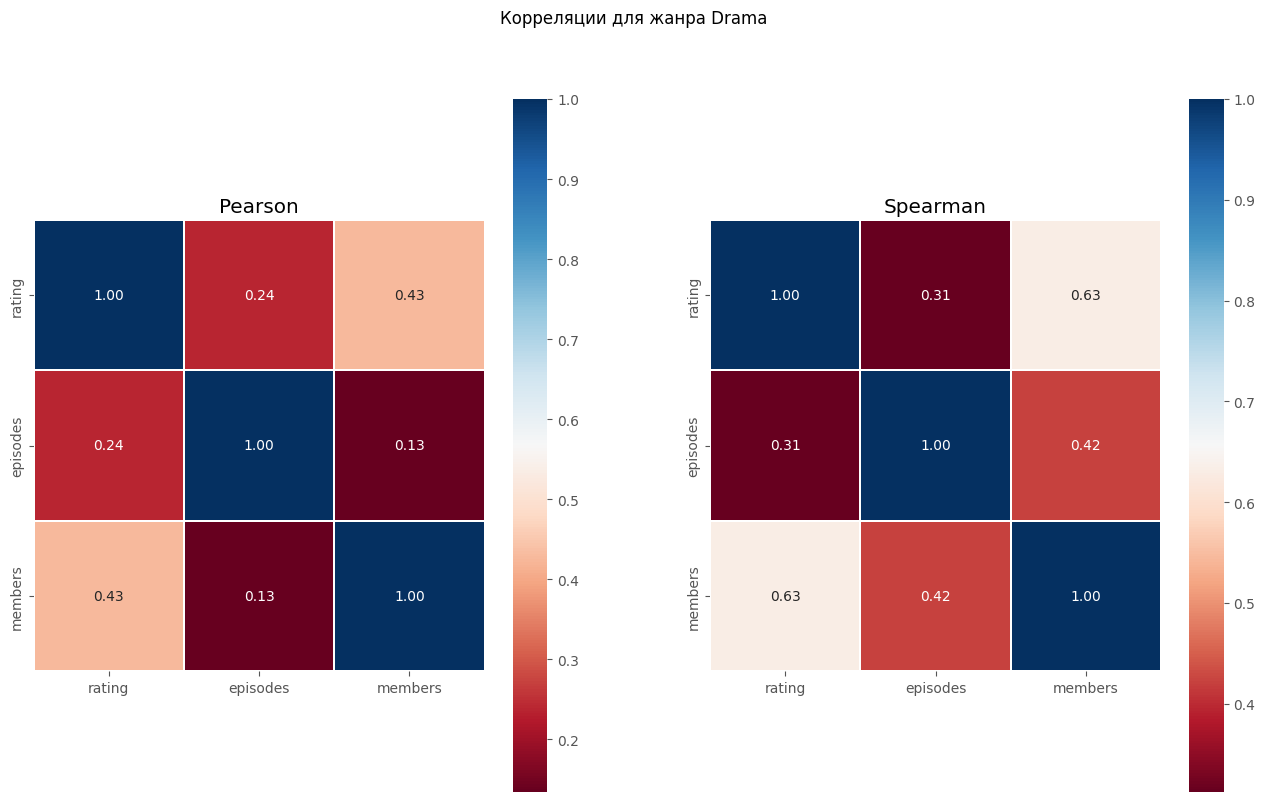

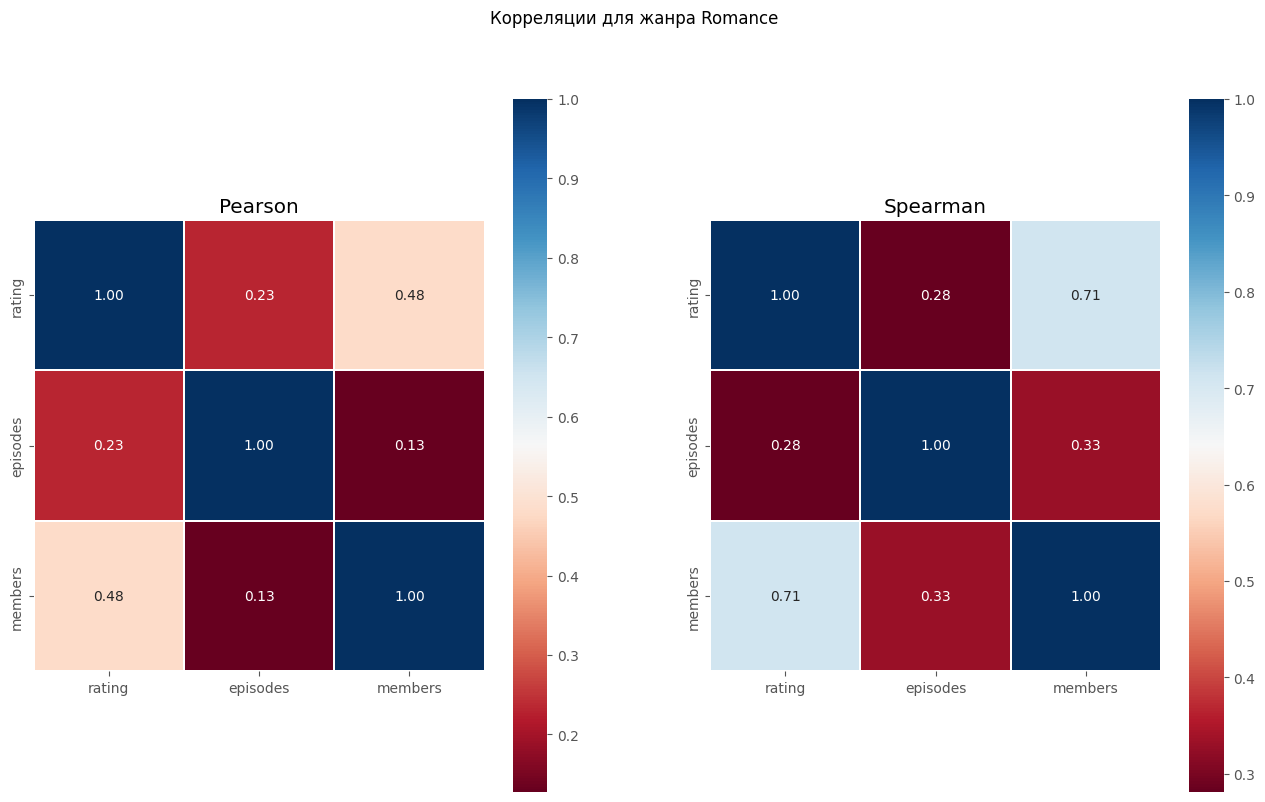

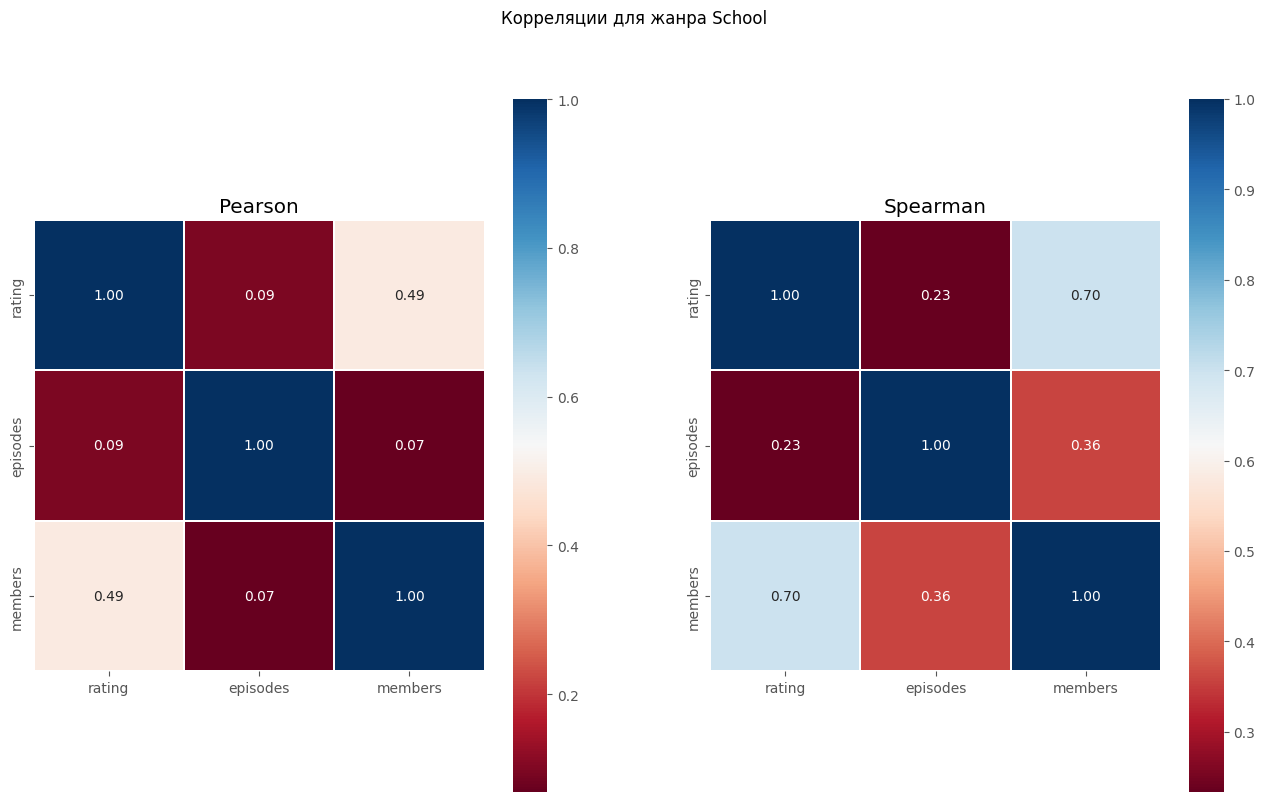

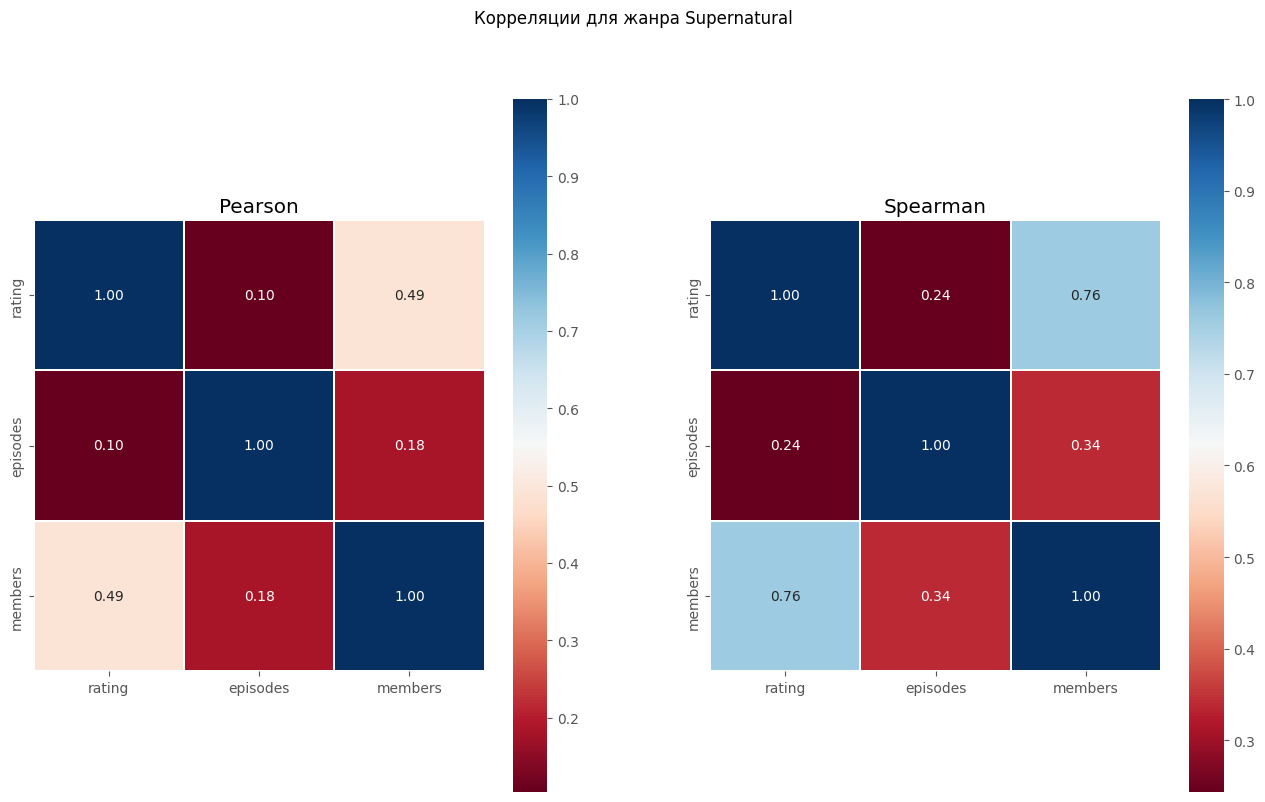

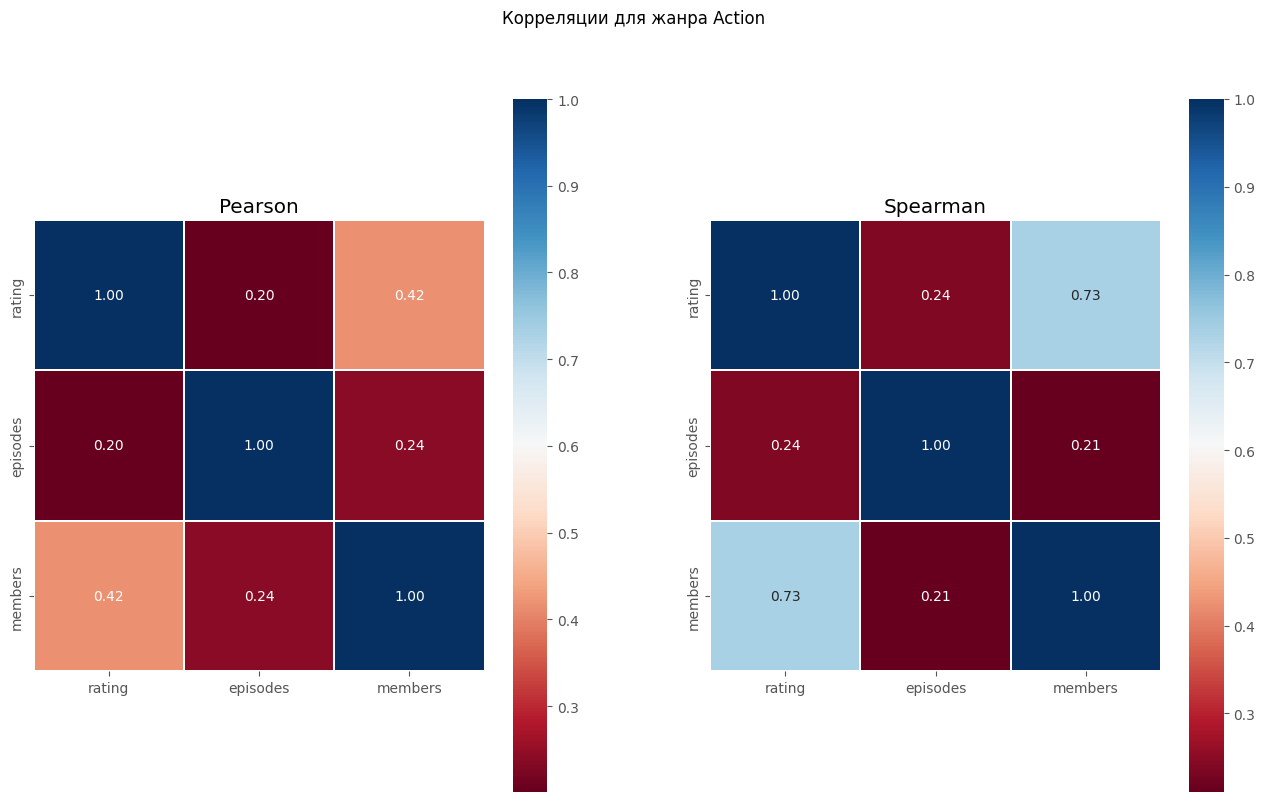

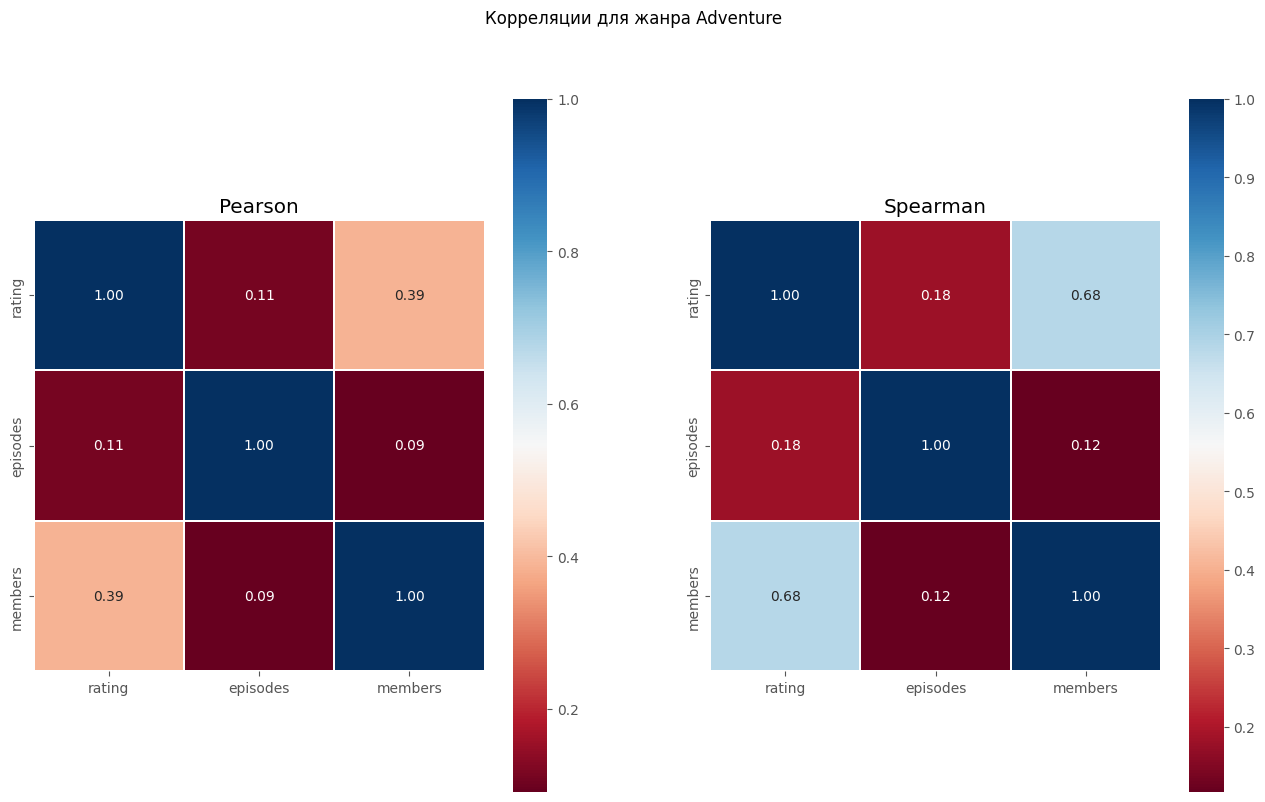

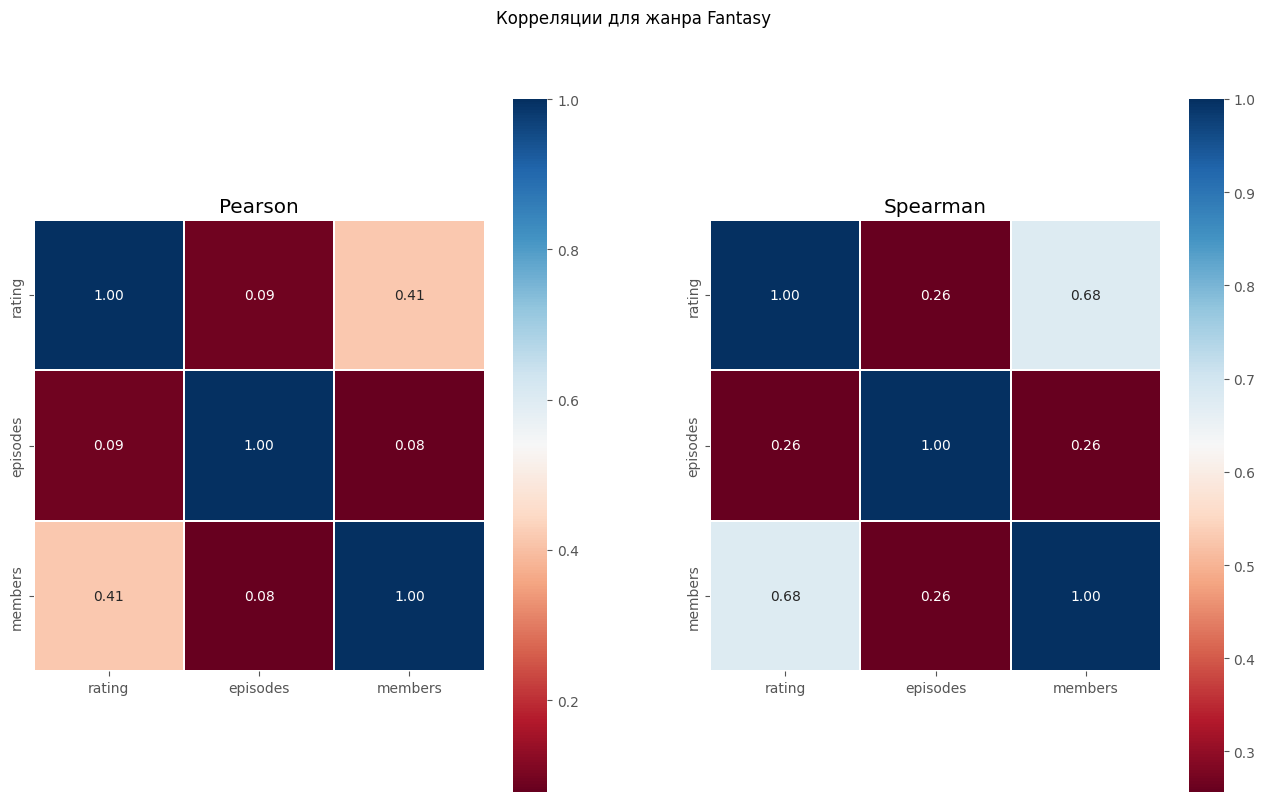

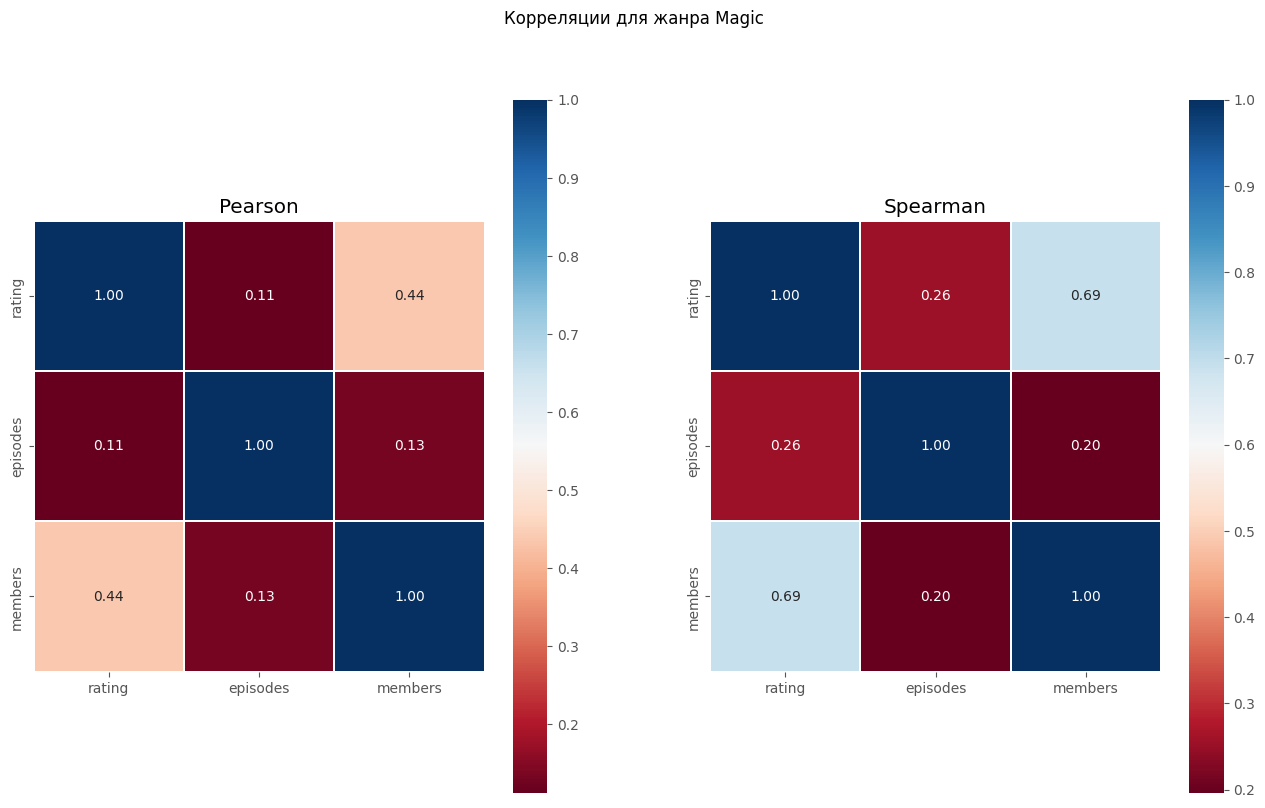

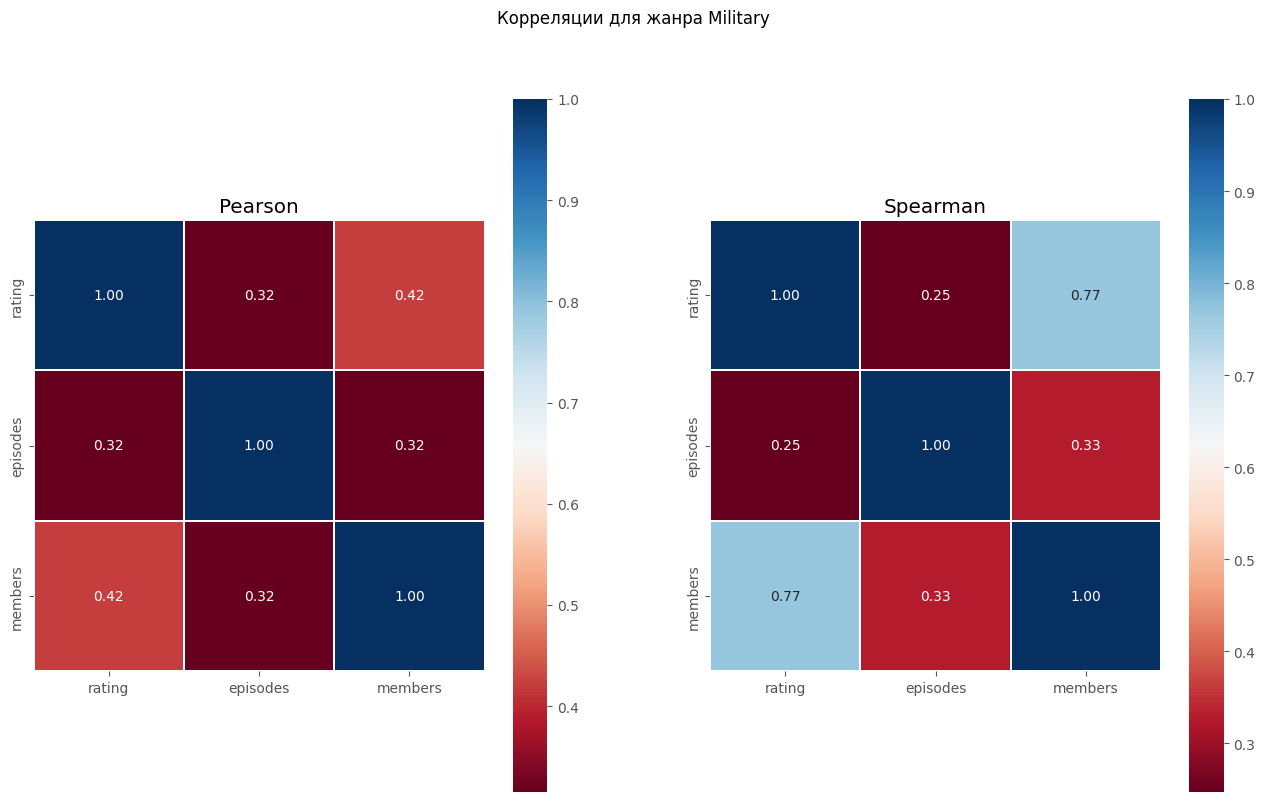

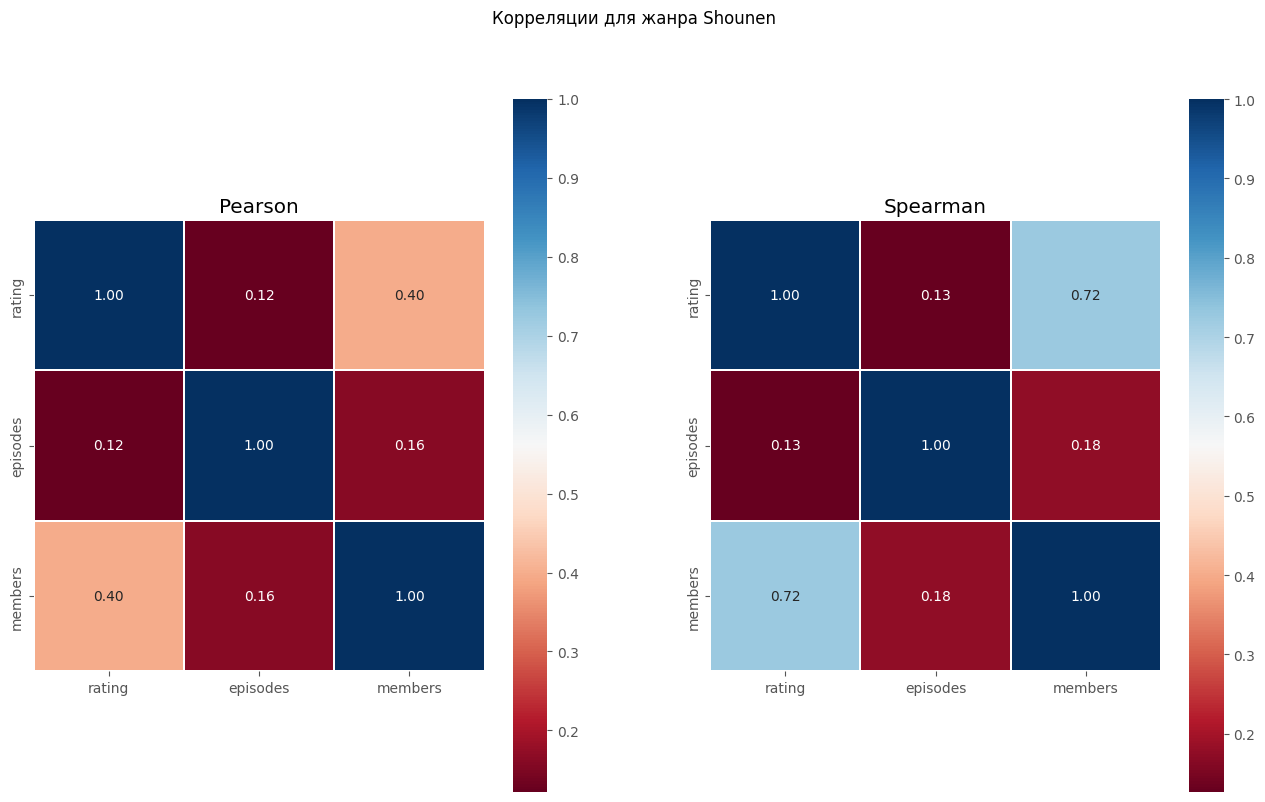

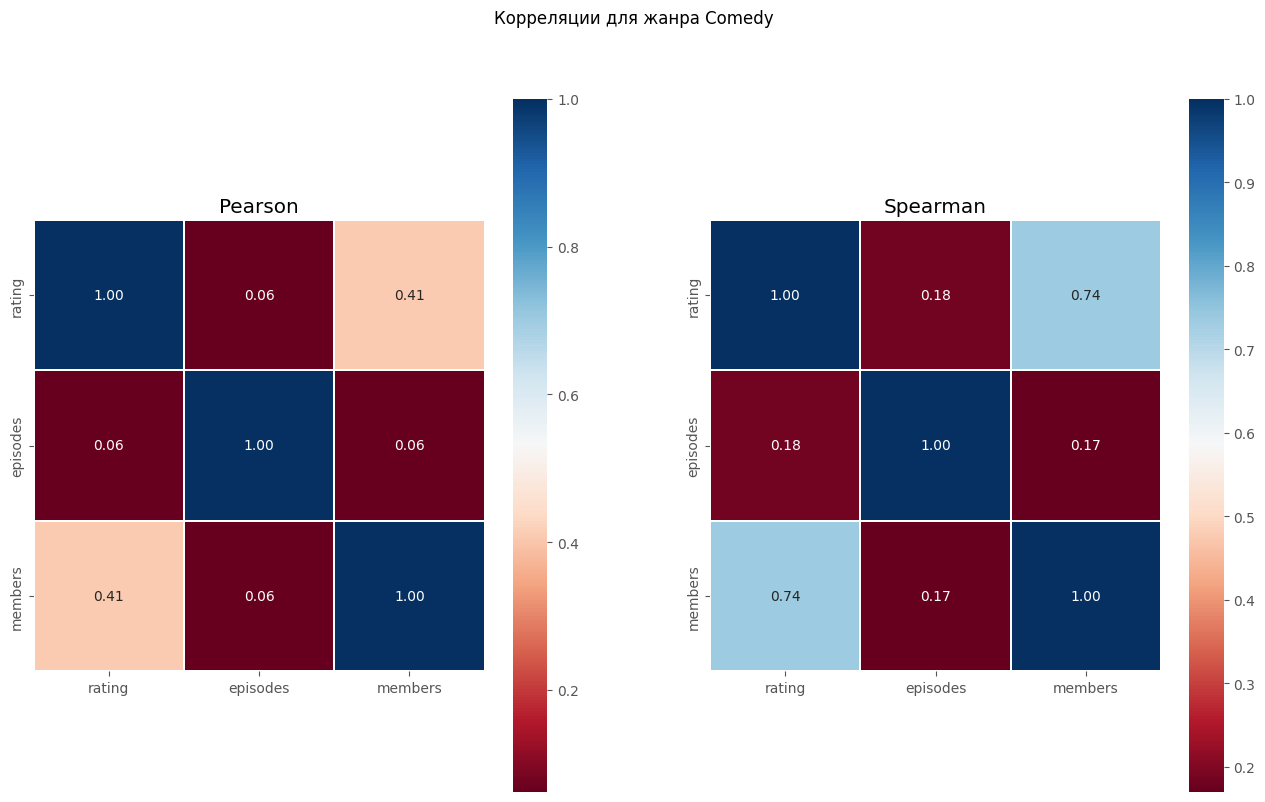

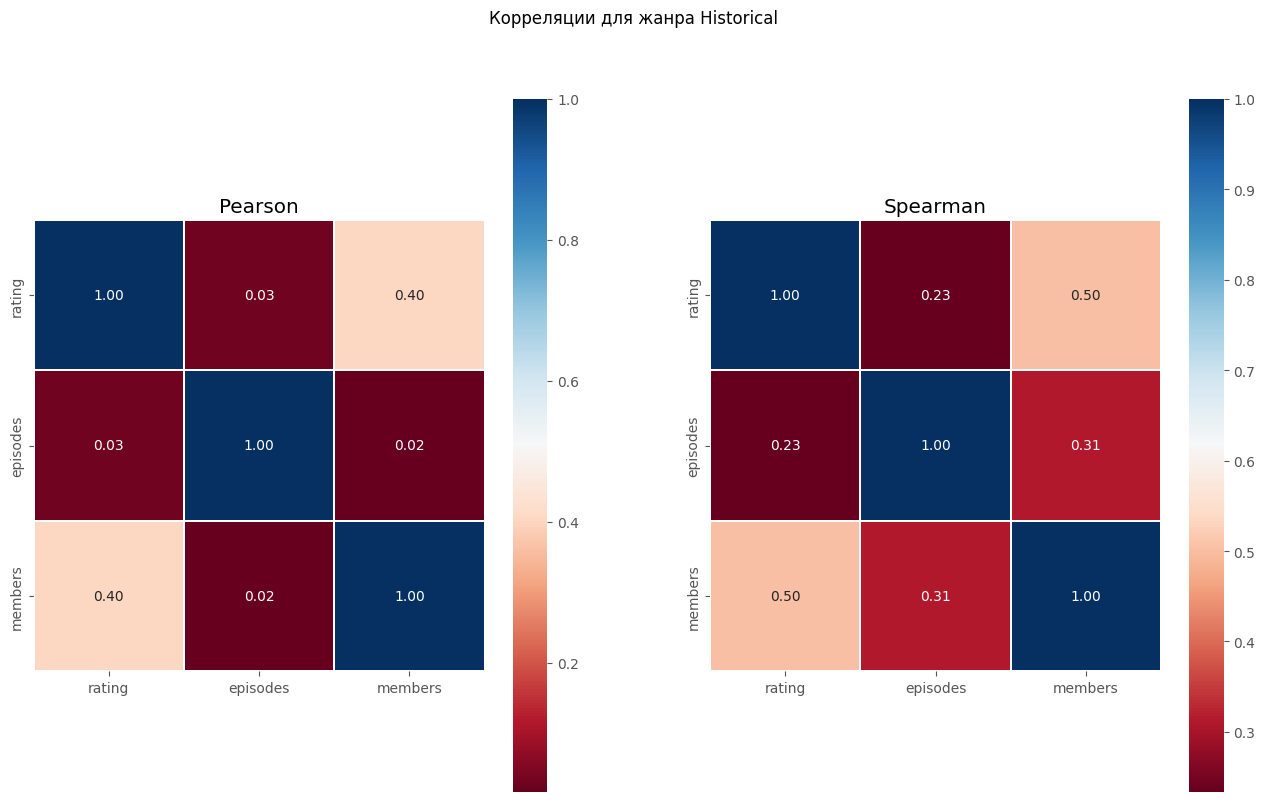

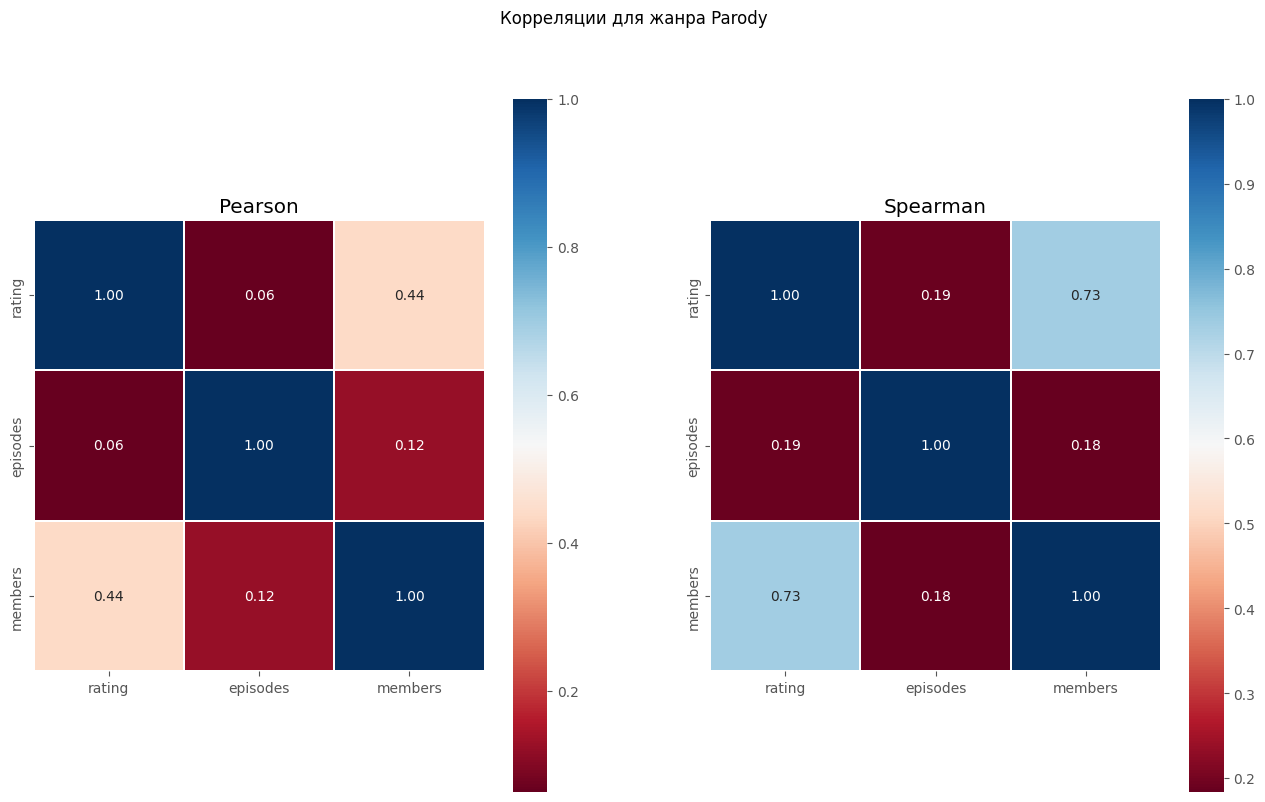

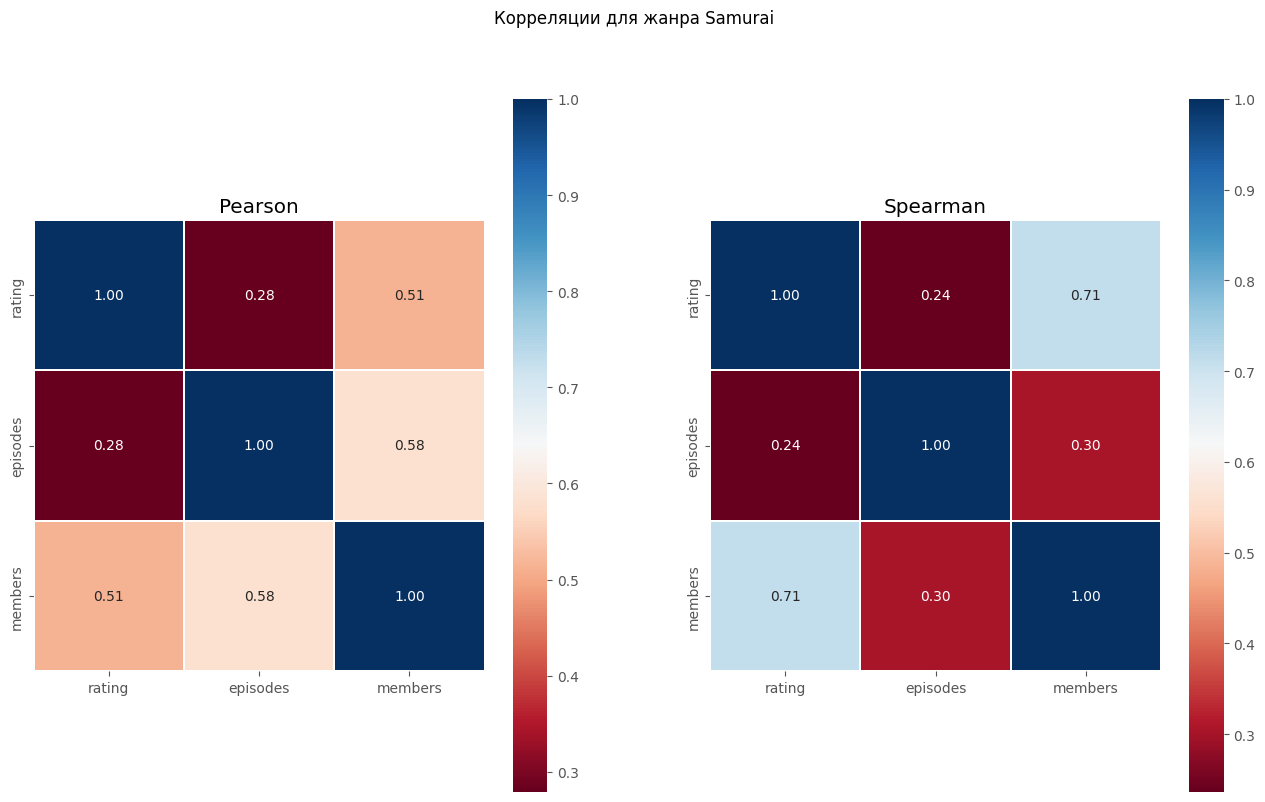

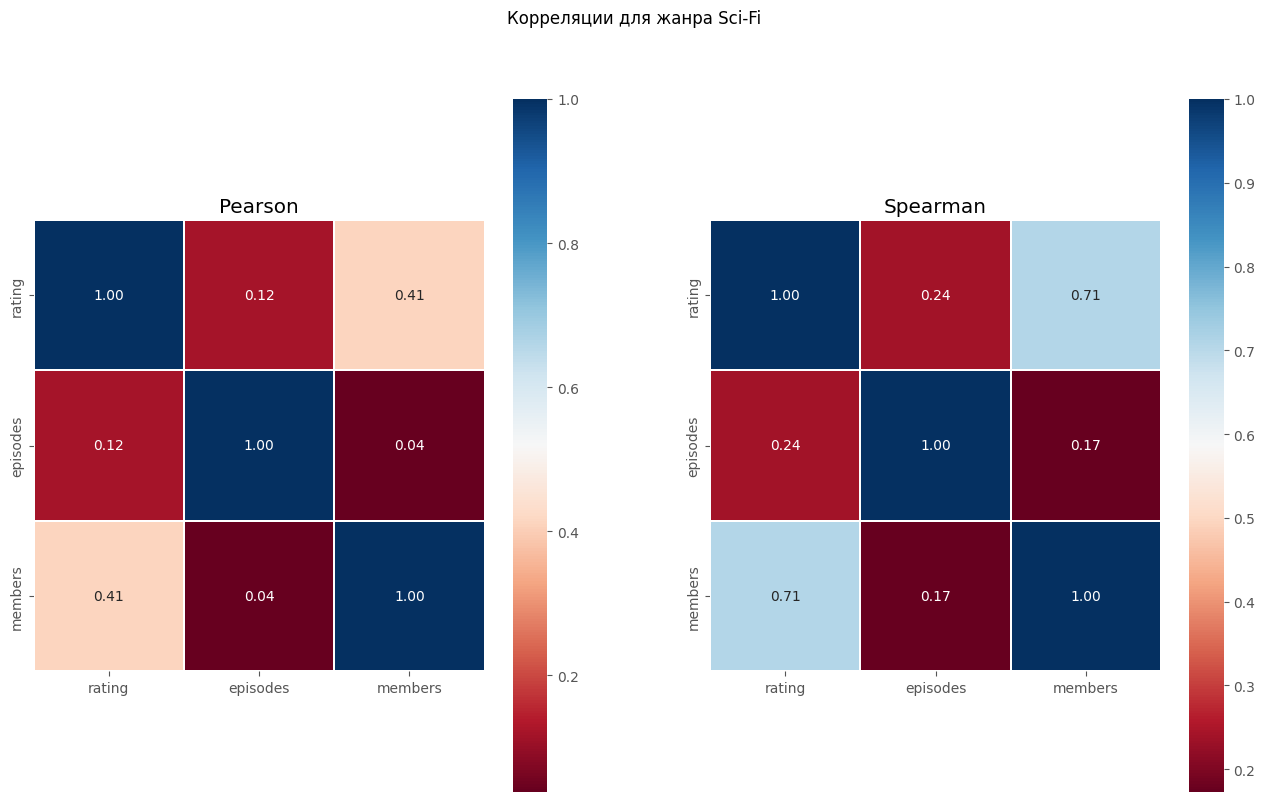

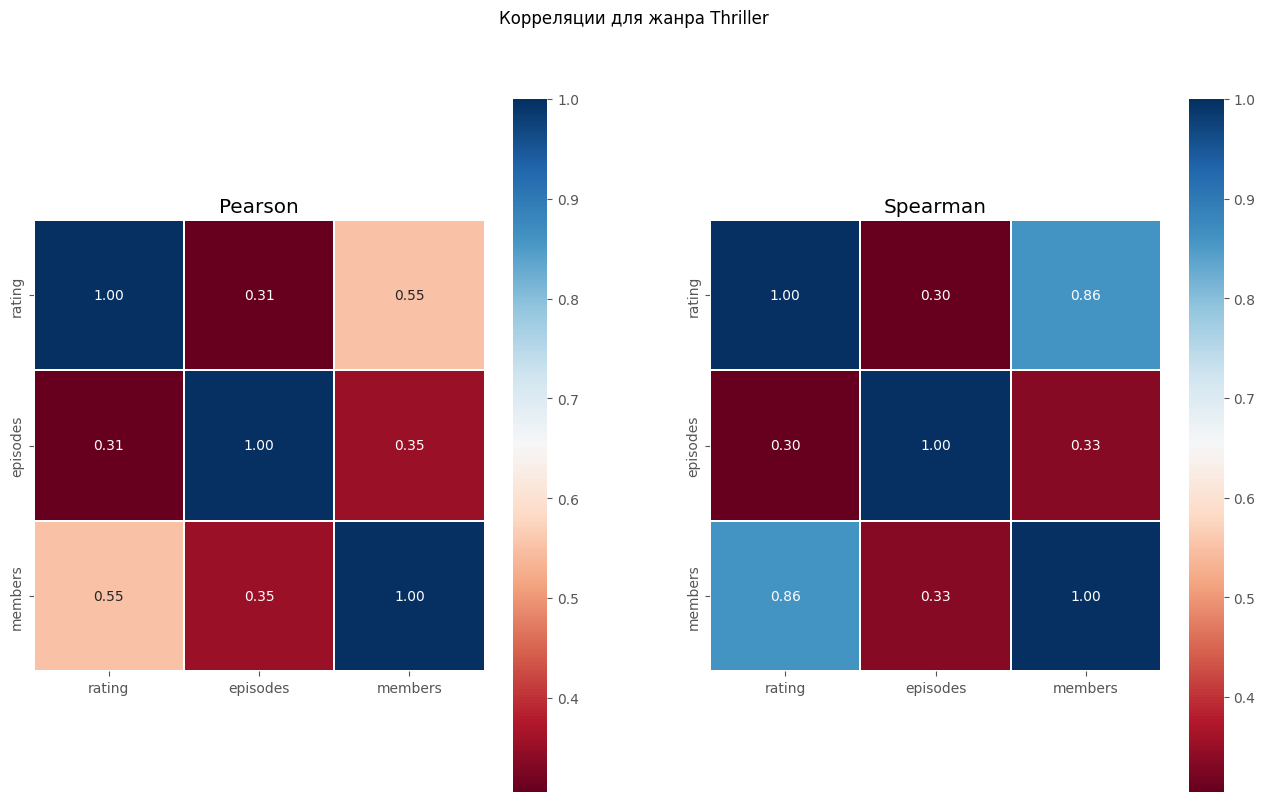

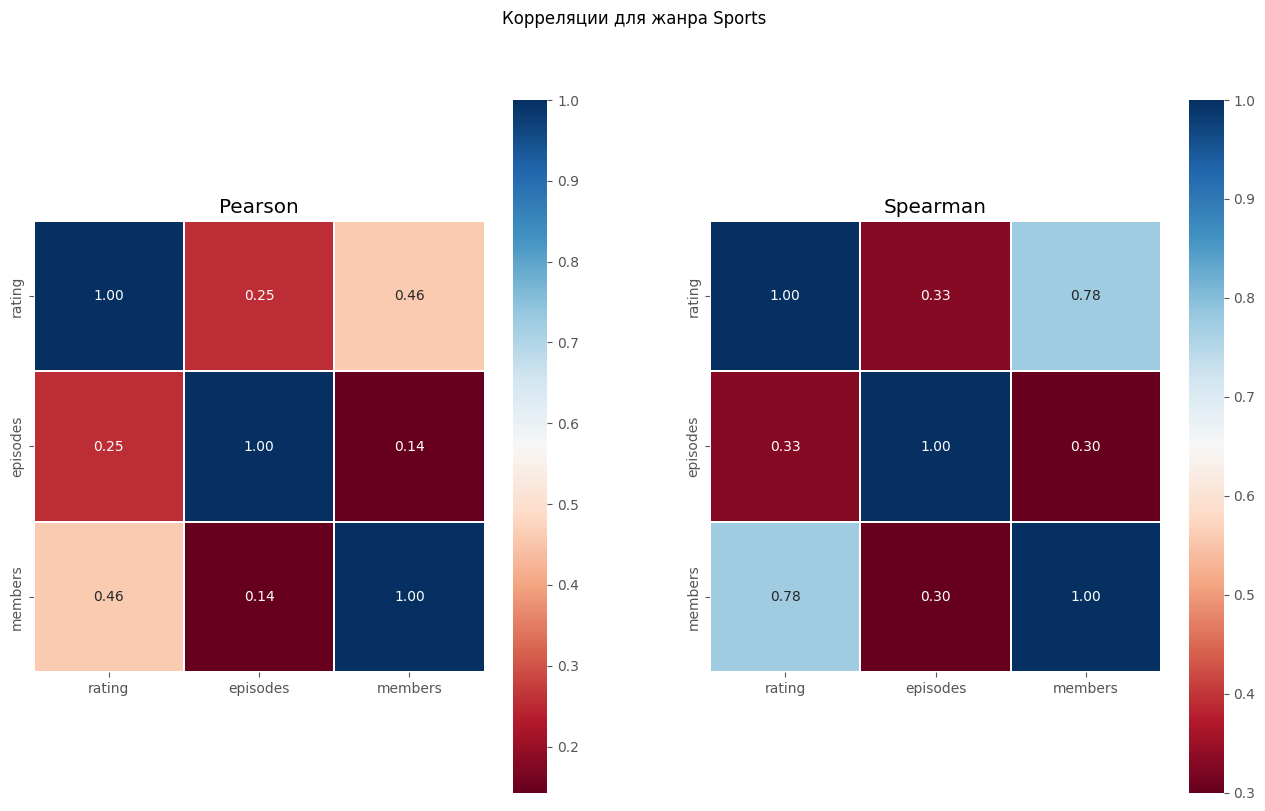

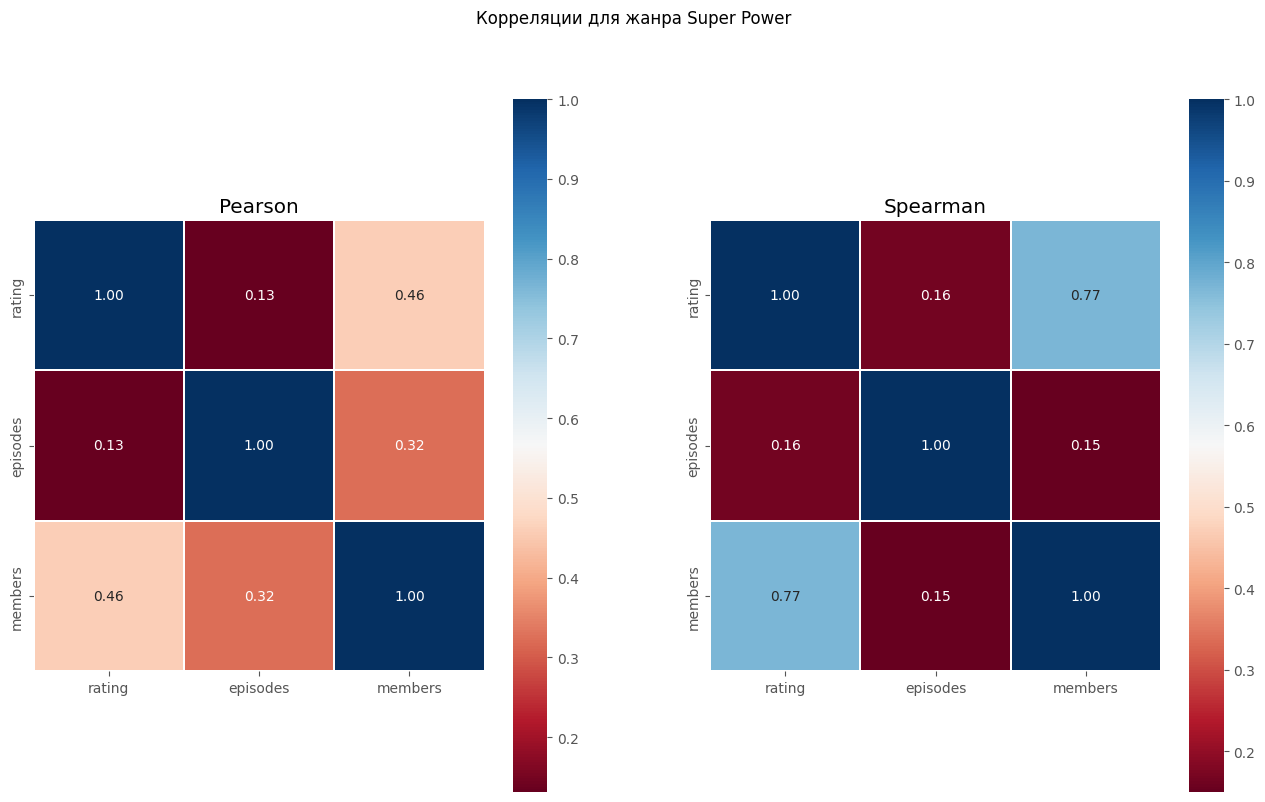

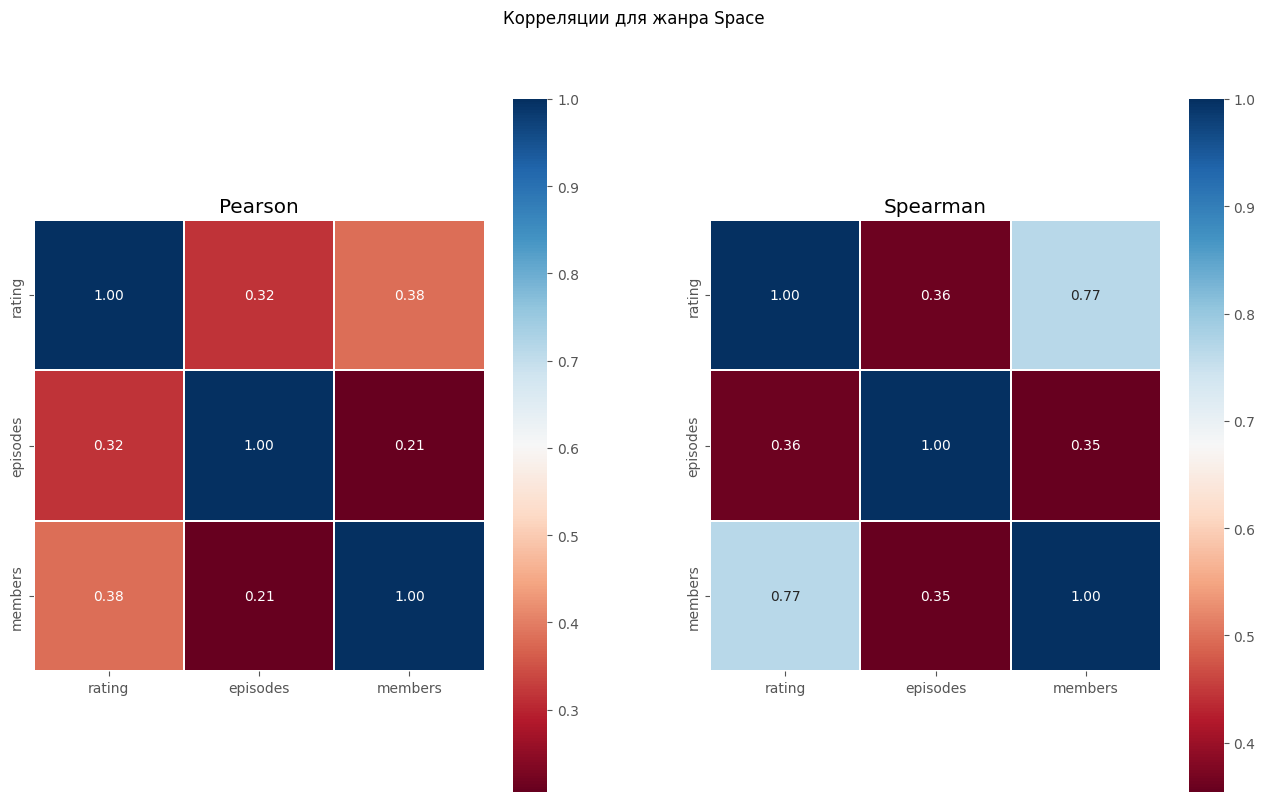

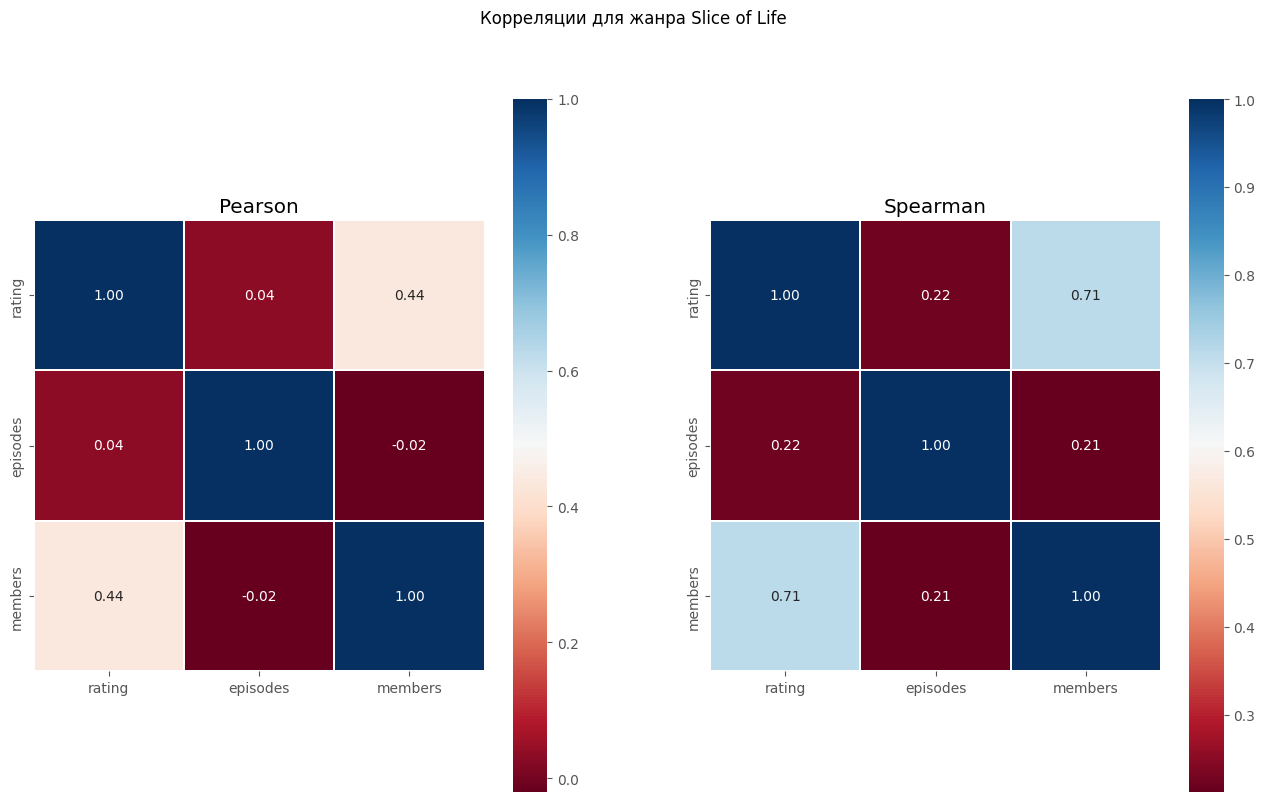

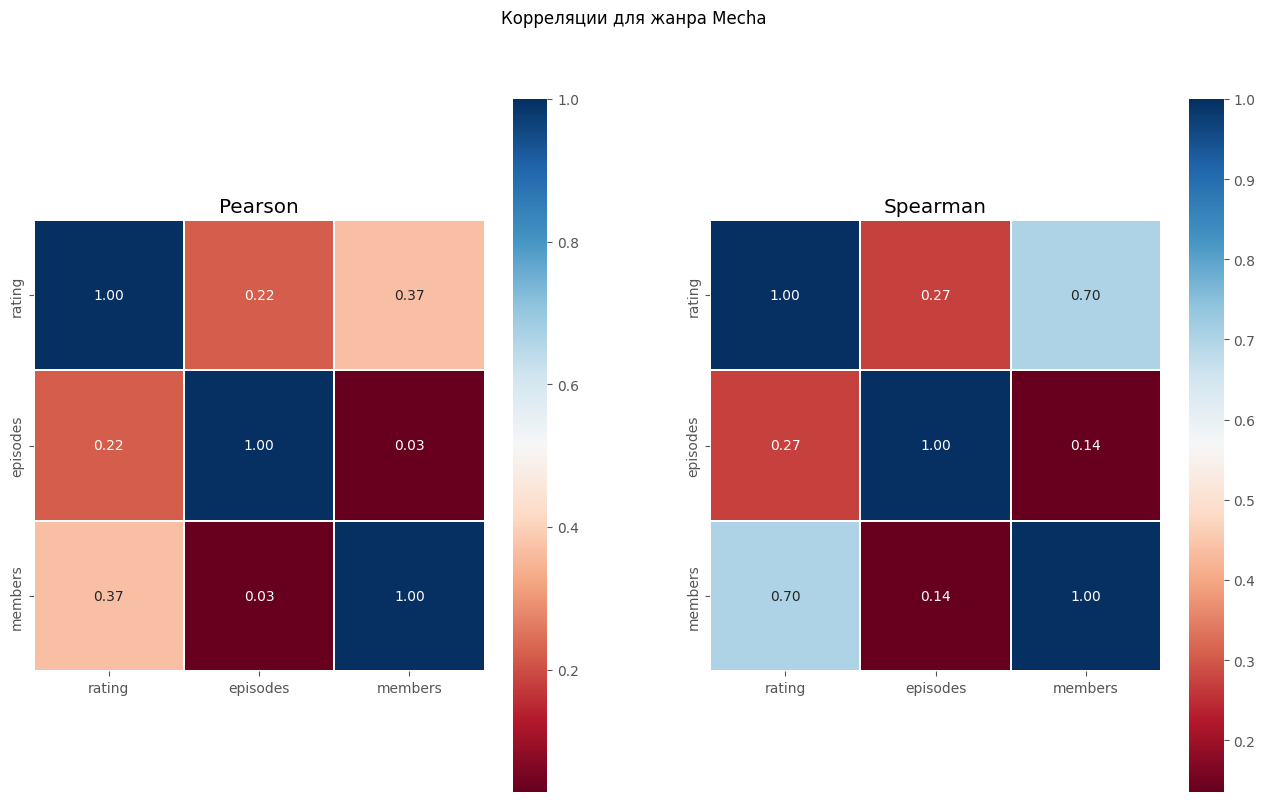

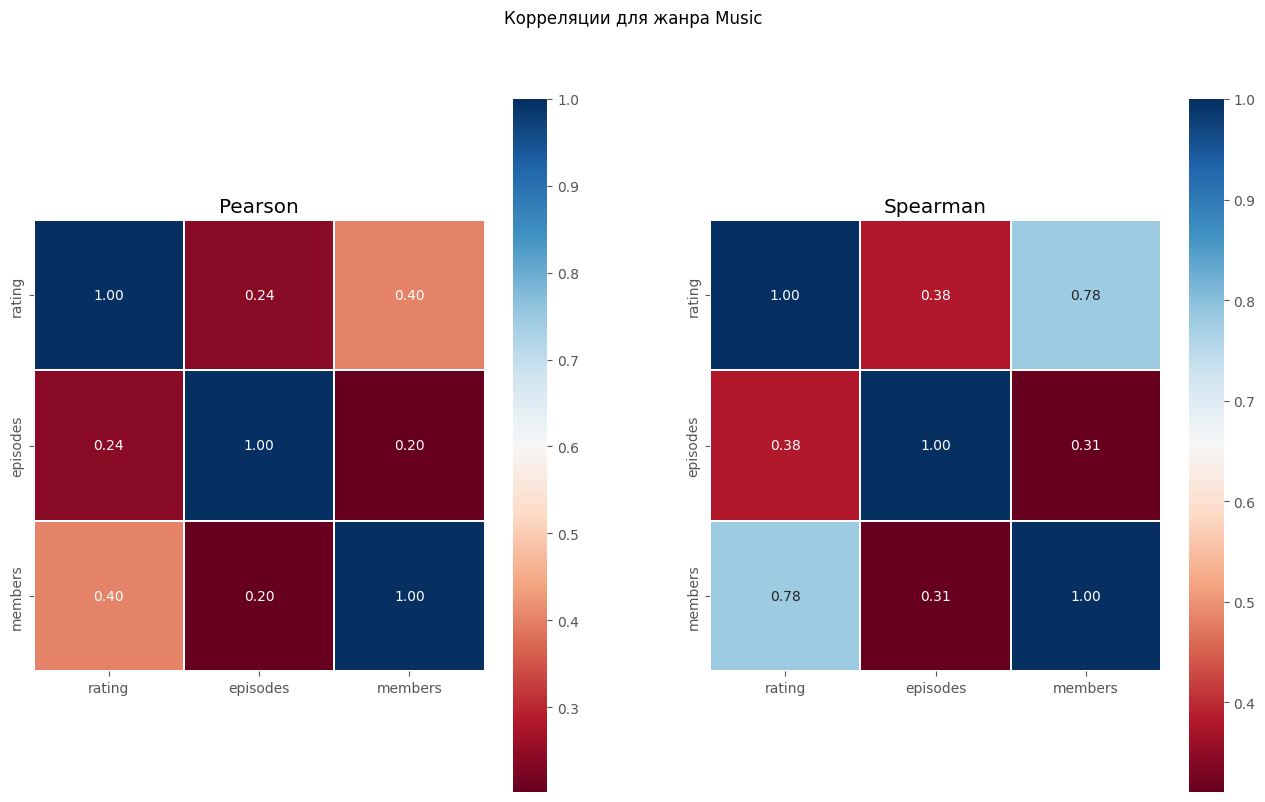

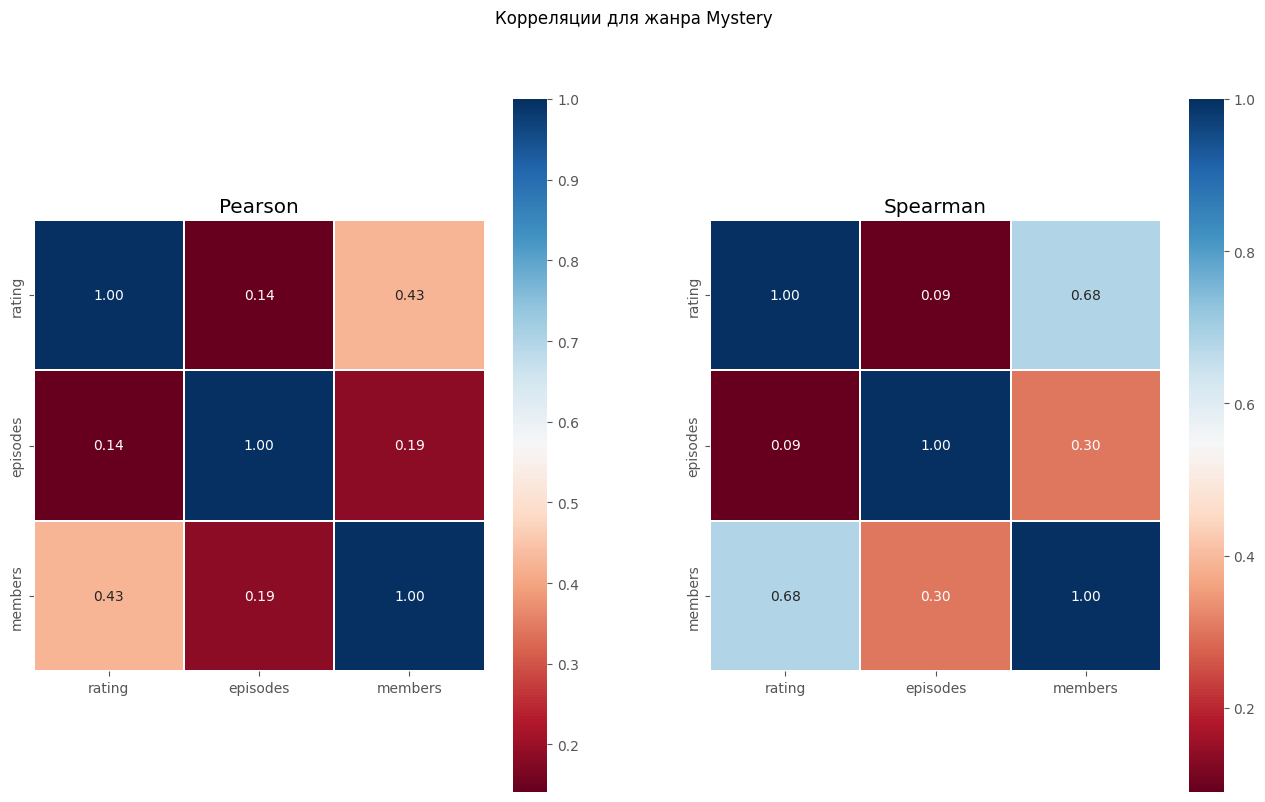

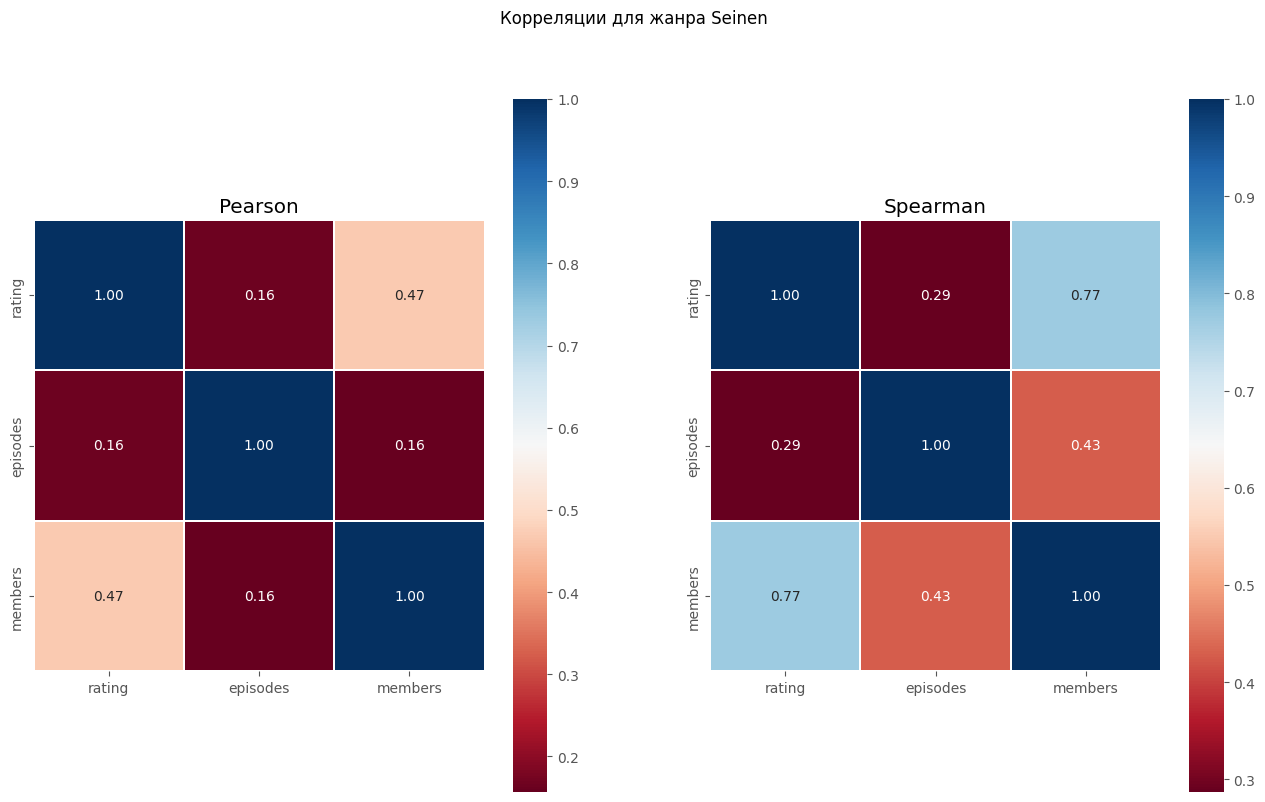

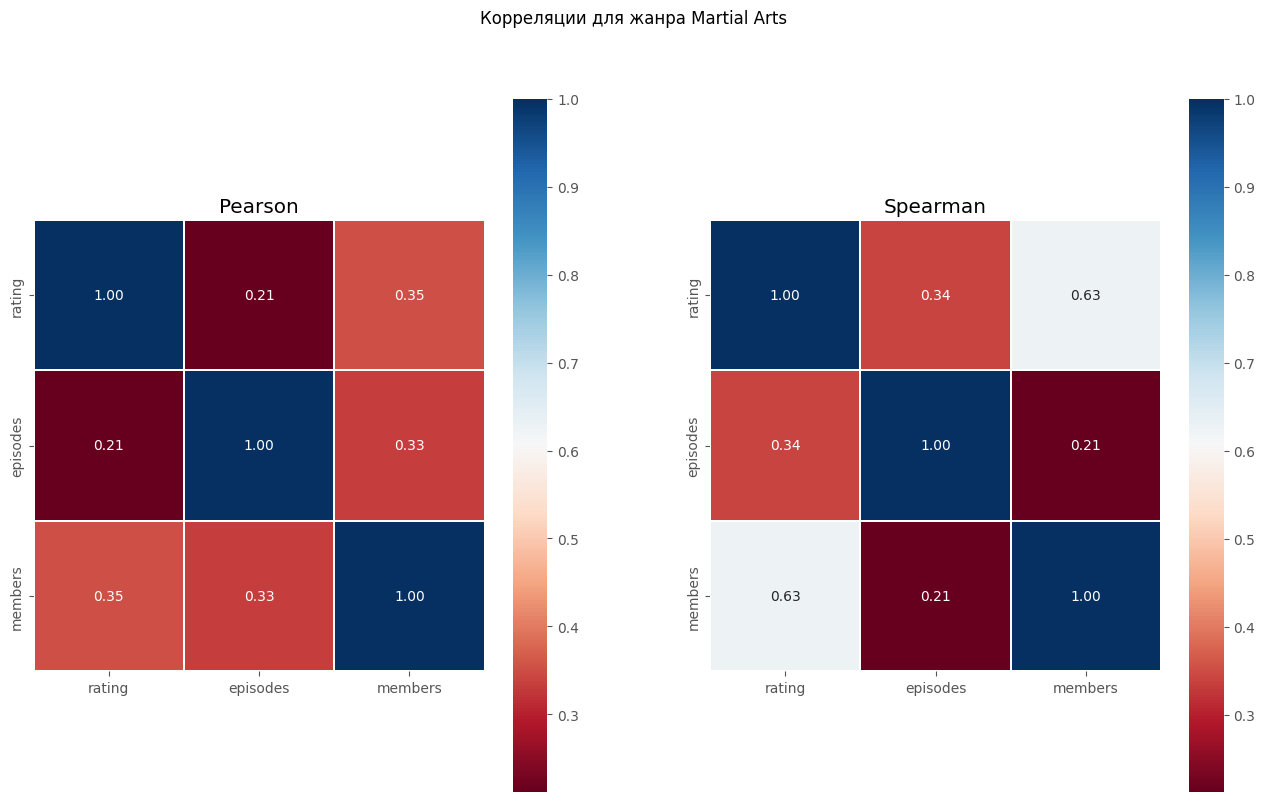

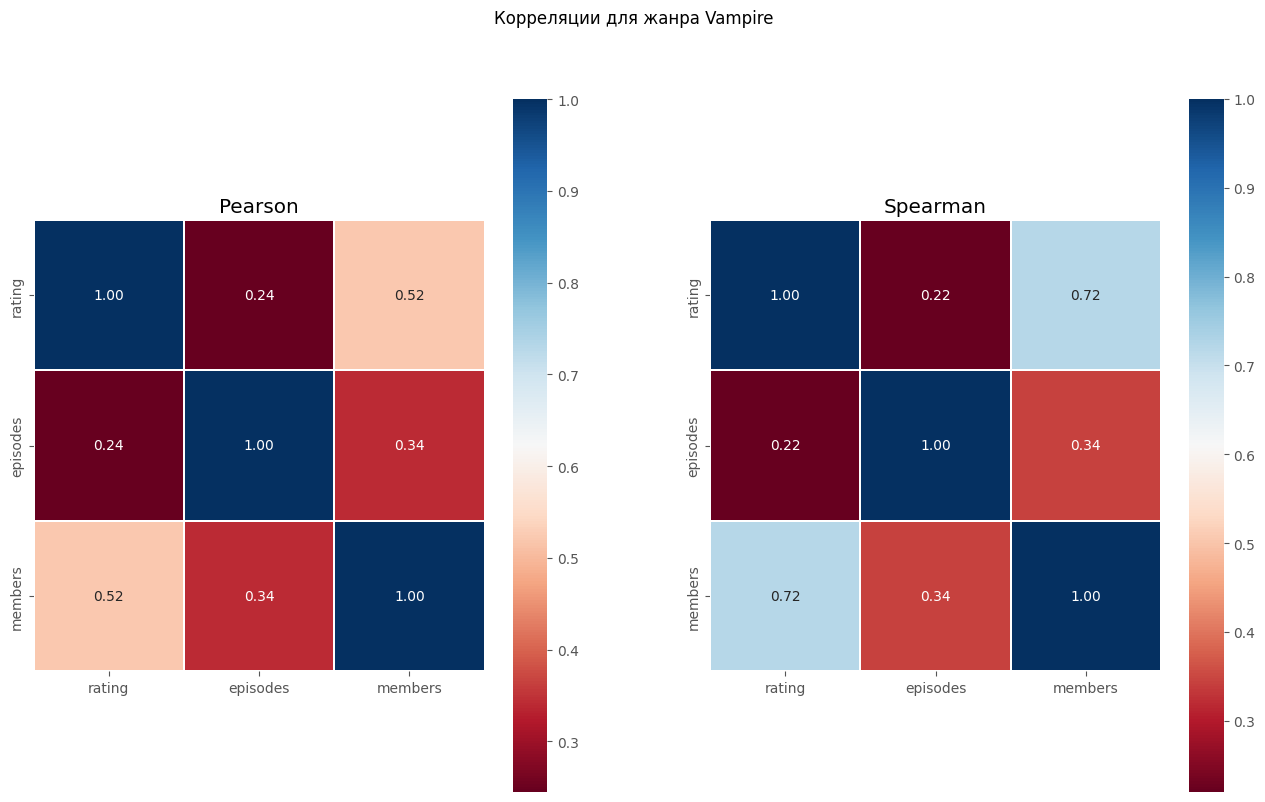

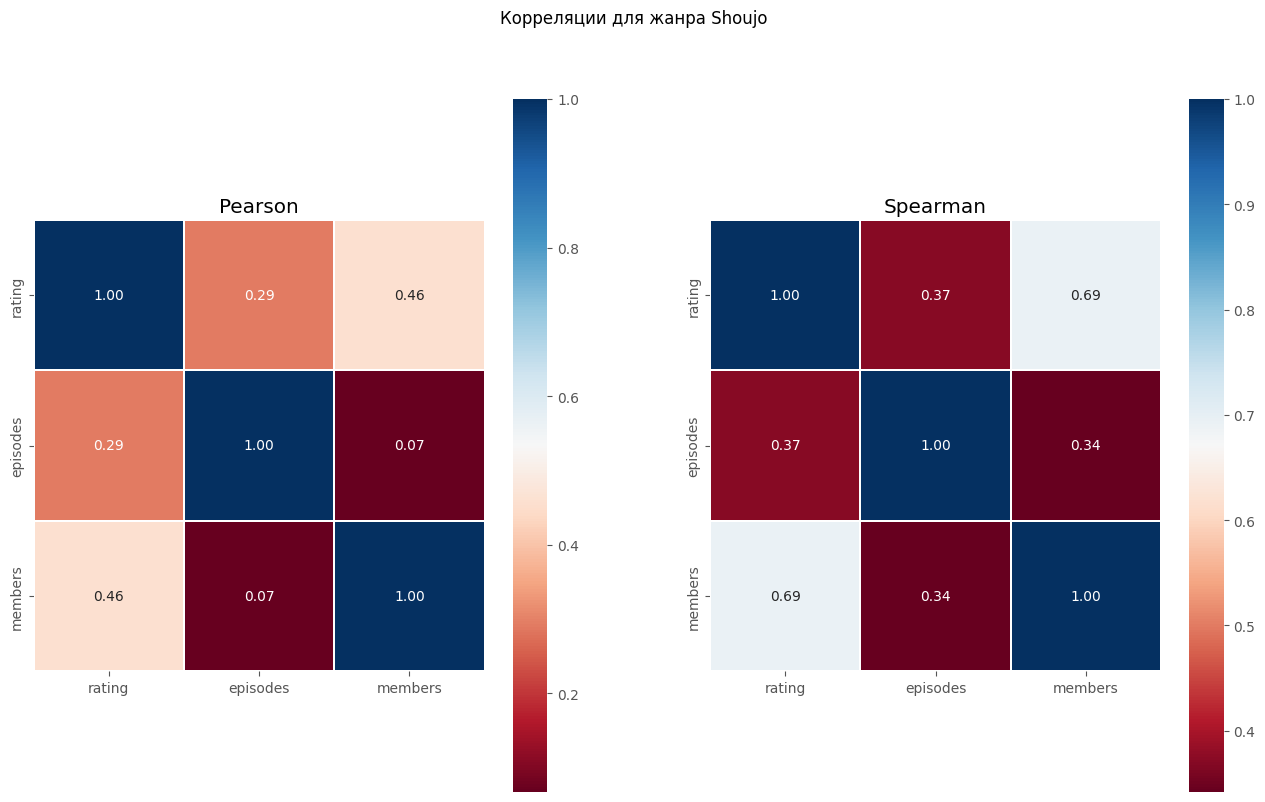

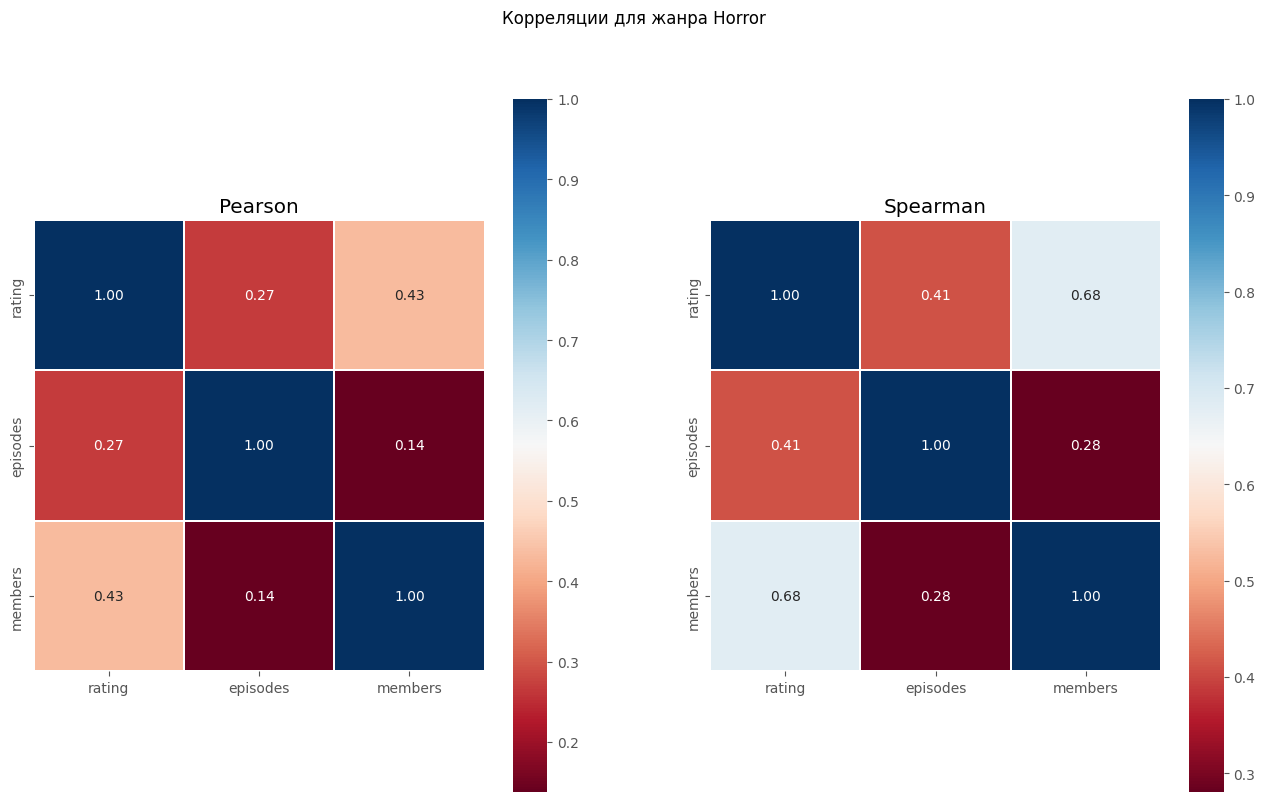

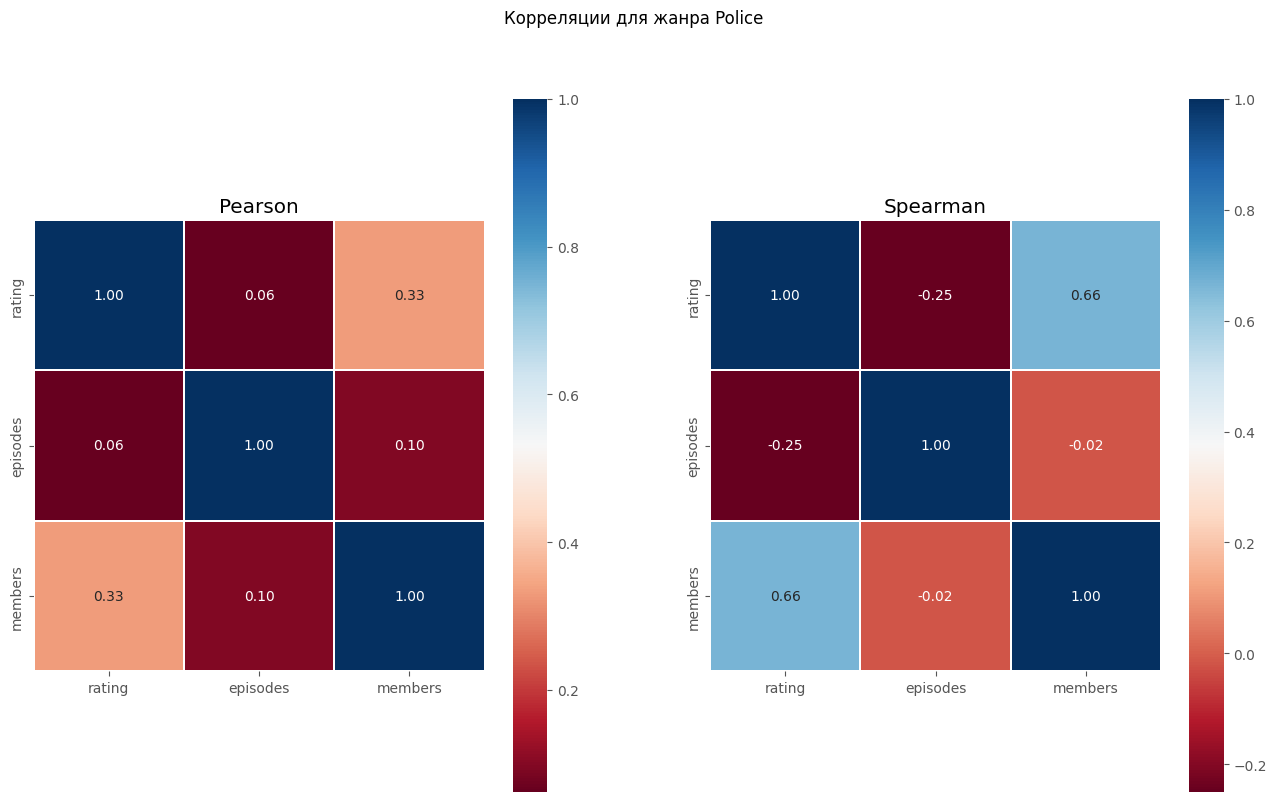

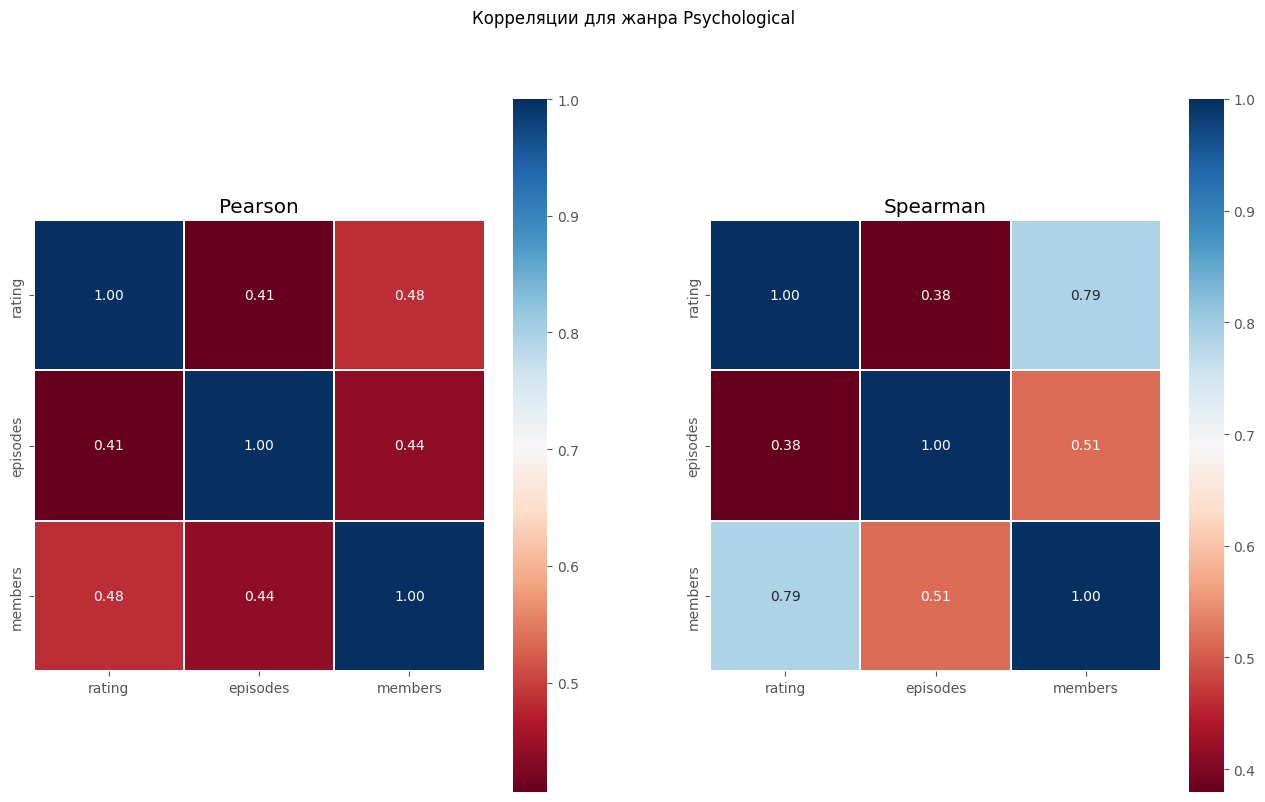

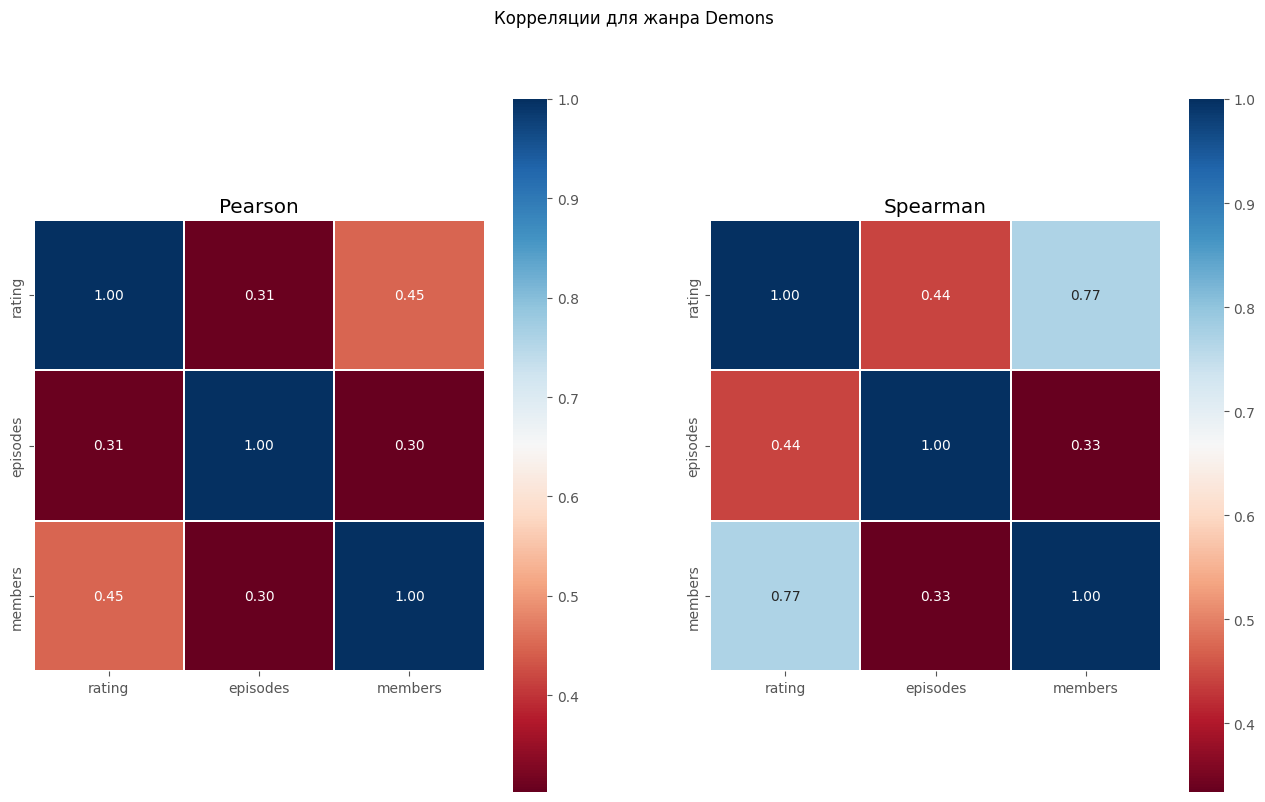

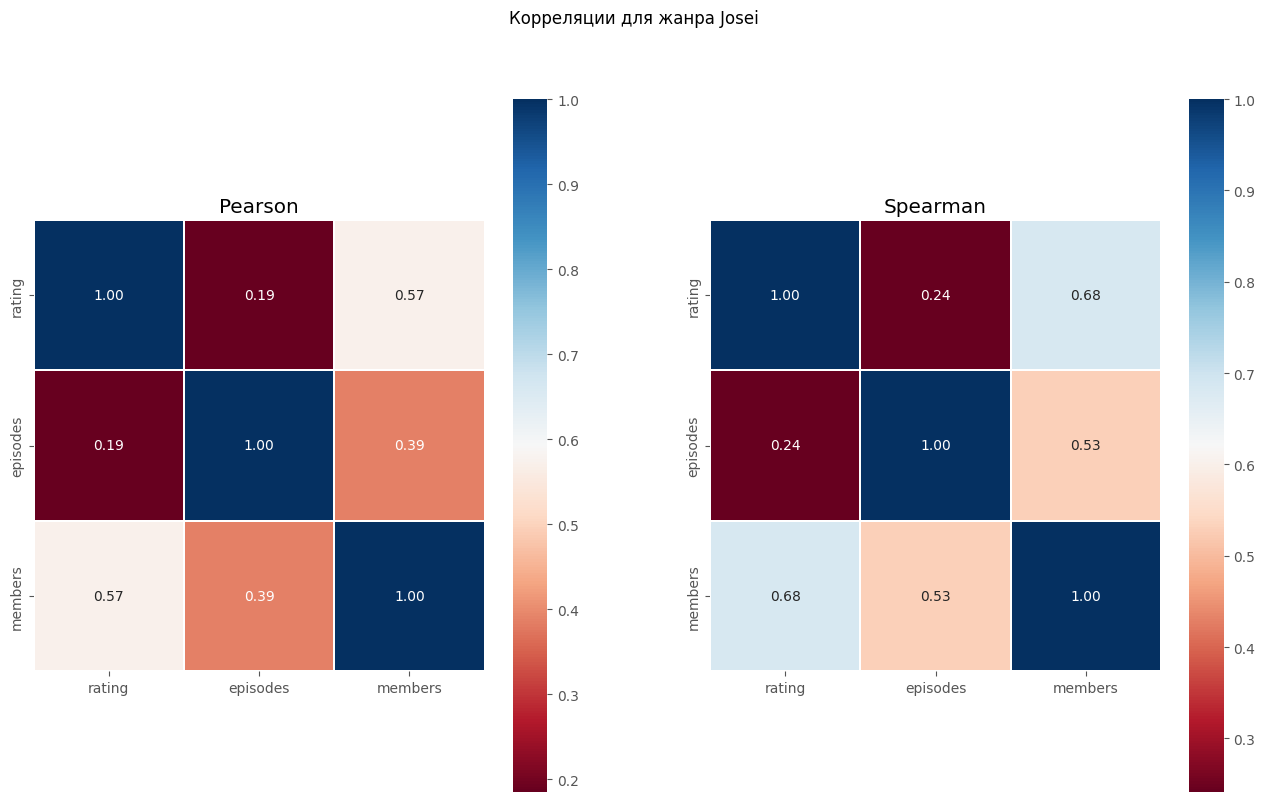

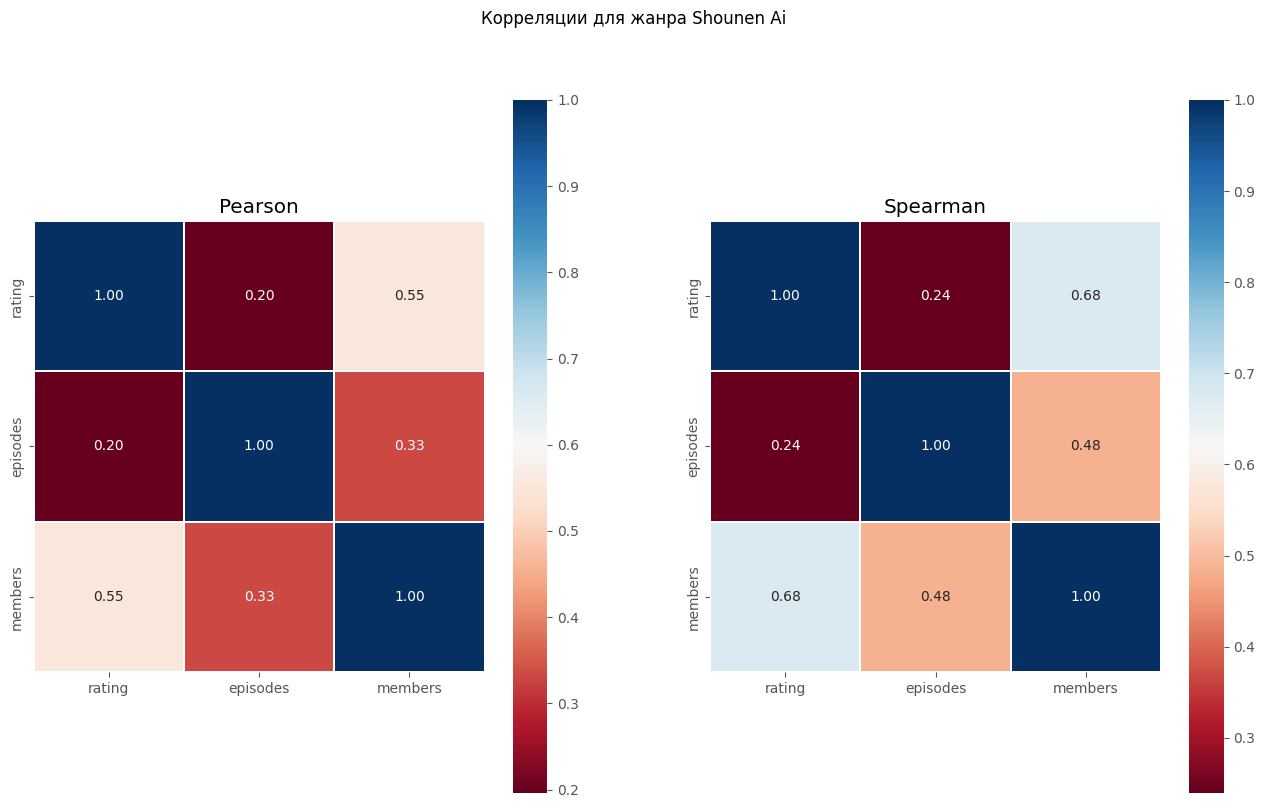

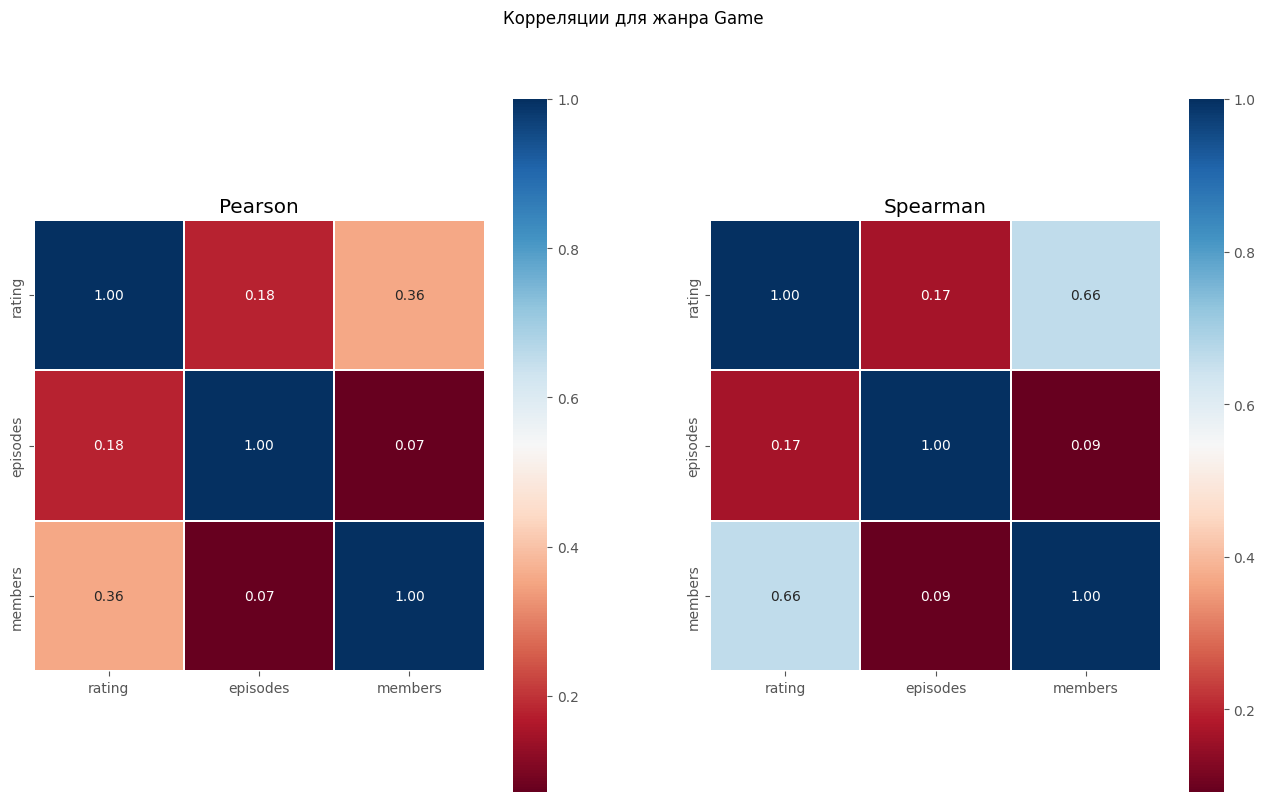

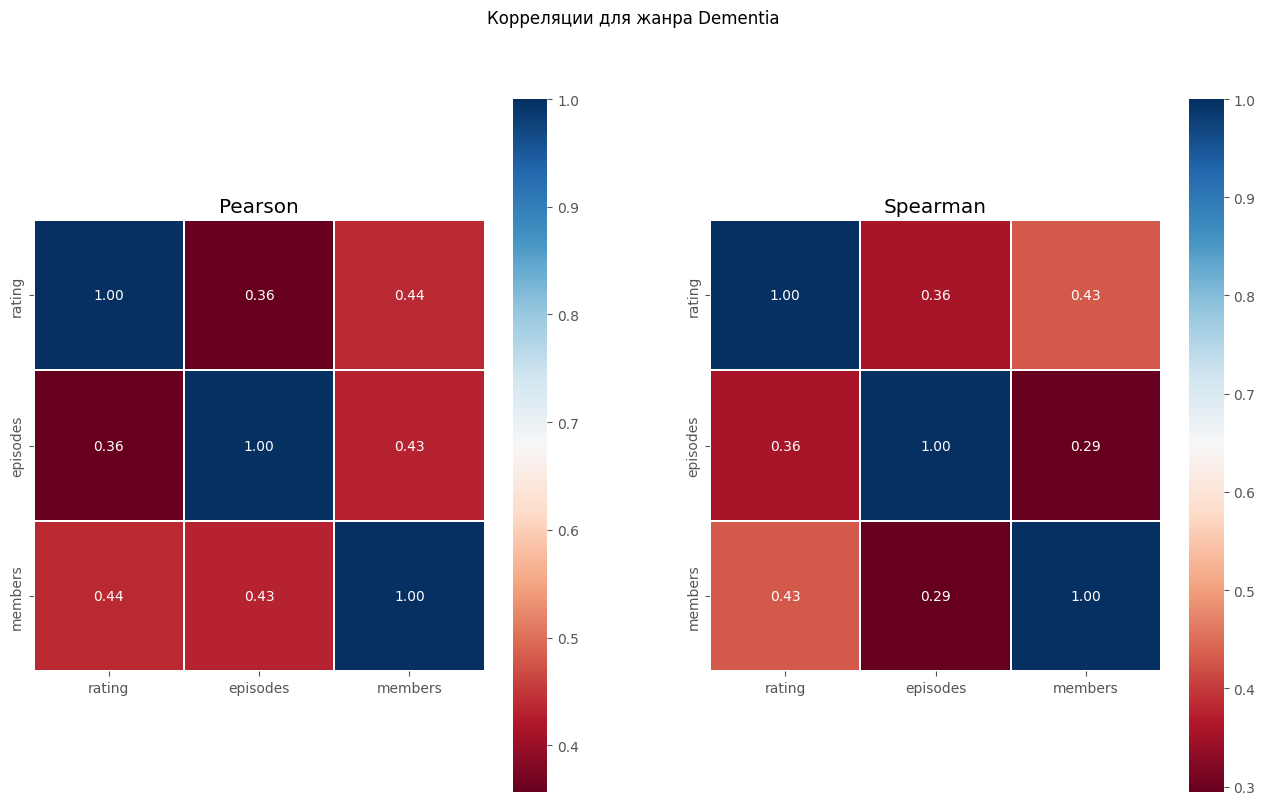

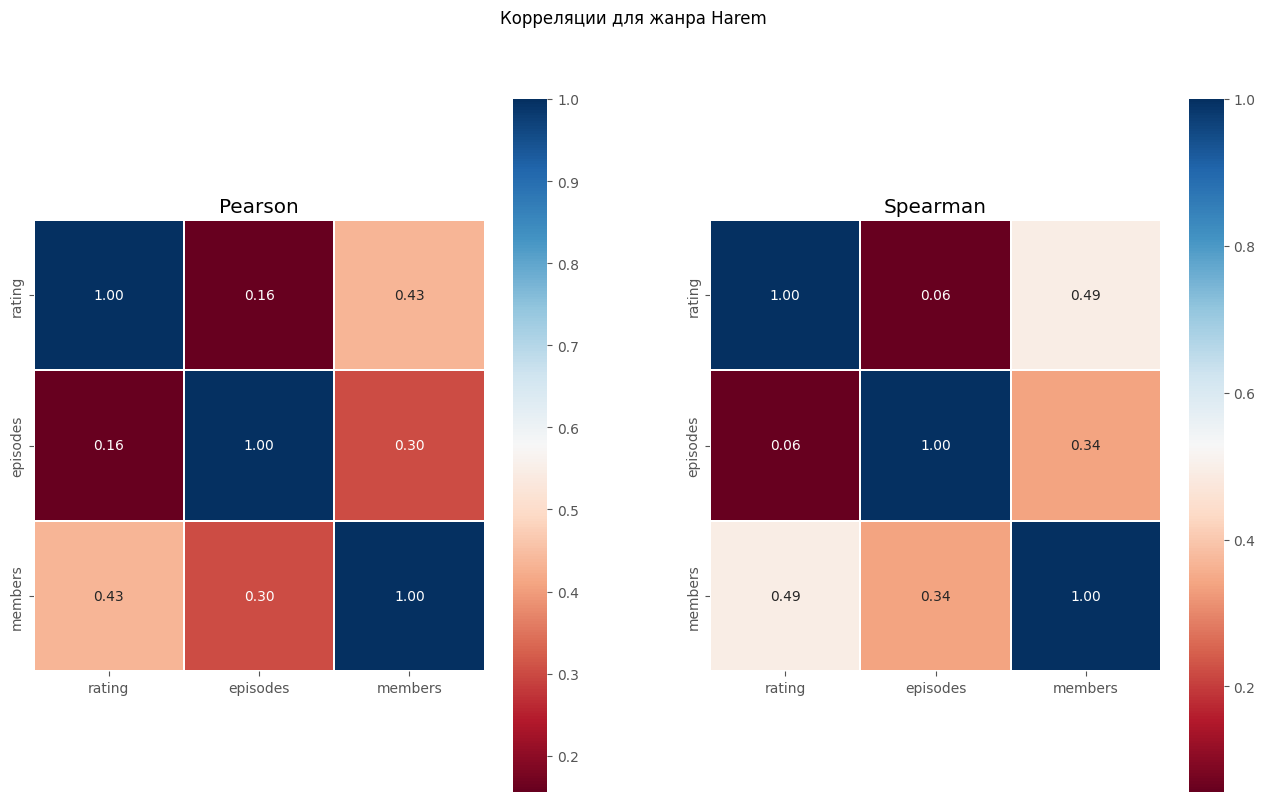

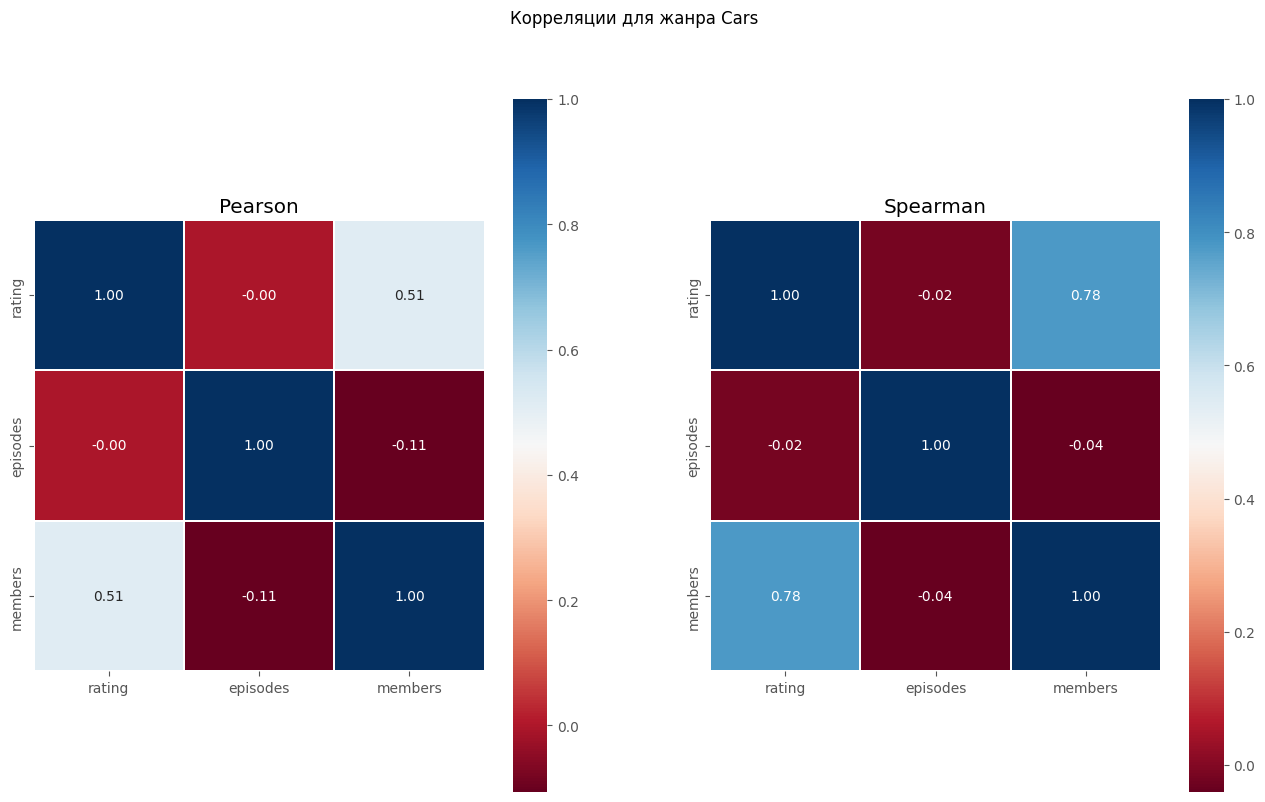

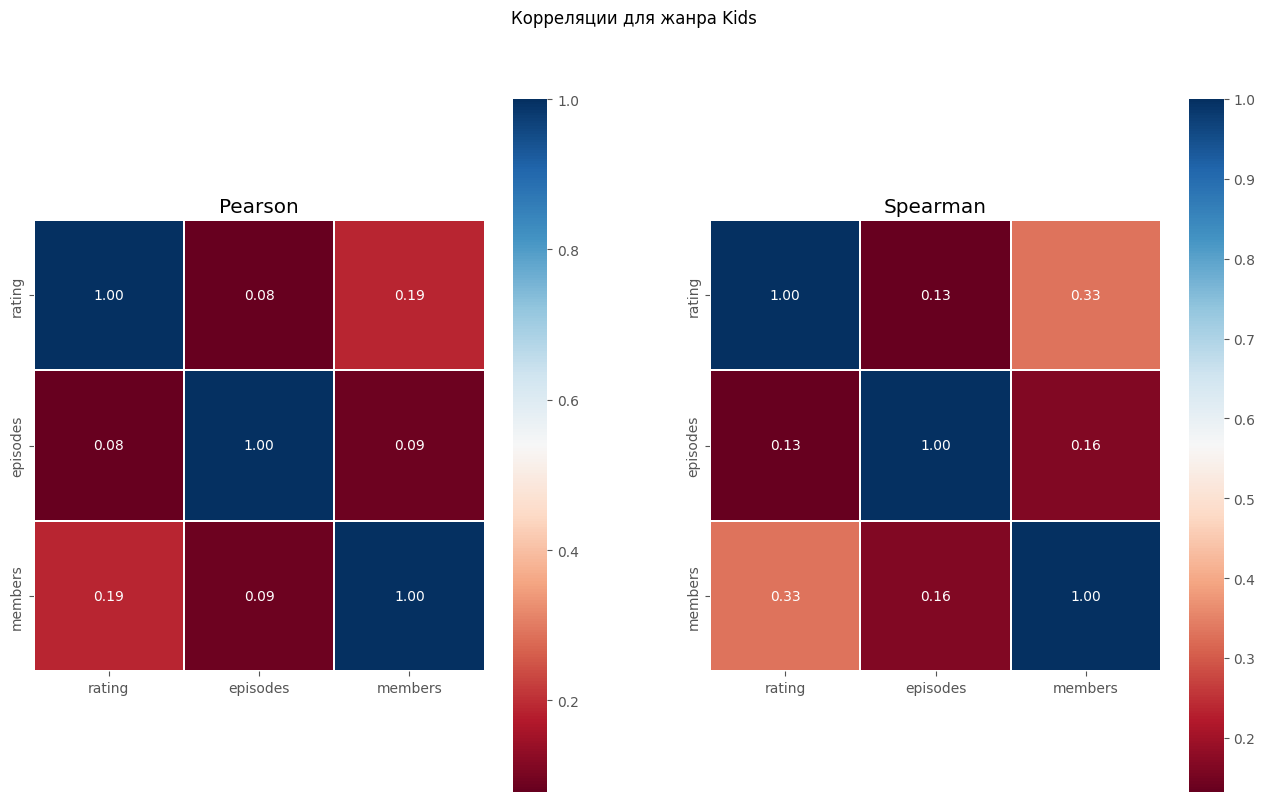

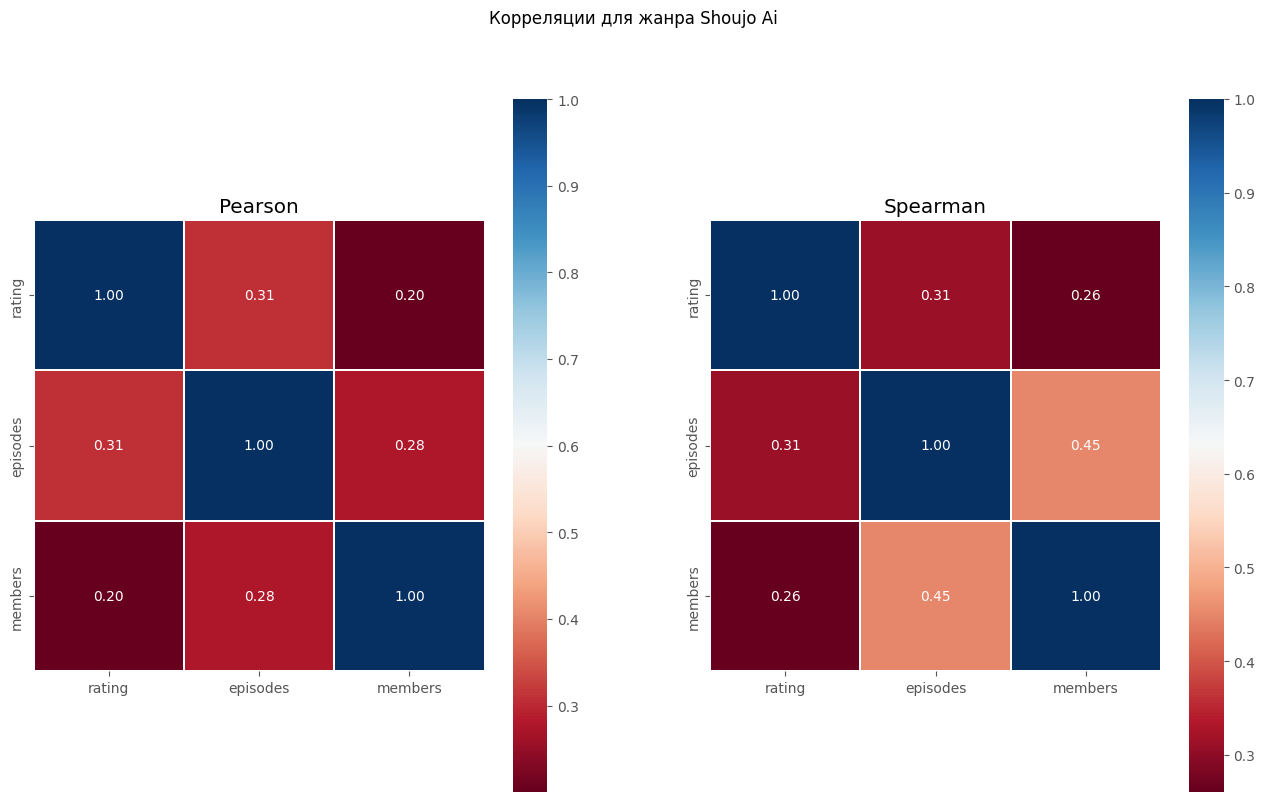

In [385]:
anime_genres = df_splitted_genres['genre'].dropna().unique()

for genre in anime_genres:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
  fig.suptitle('Корреляции для жанра ' + genre)
  ax1 = sns.heatmap(df_splitted_genres[df_splitted_genres['genre'] == genre][['rating', 'episodes', 'members']].corr(method='pearson', numeric_only=True), ax=ax1, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
  ax1 = ax1.set_title('Pearson')
  ax2 = sns.heatmap(df_splitted_genres[df_splitted_genres['genre'] == genre][['rating', 'episodes', 'members']].corr(method='spearman', numeric_only=True), ax=ax2, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
  ax2 = ax2.set_title('Spearman')

plt.show()

## 9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме type. (1 балл)

Создадим датасет с необходимыми данными и новым признаком `genre_number`:

In [386]:
genres_number_df = df[['genre', 'rating', 'members', 'type']]
genres_number_df['genre'] = genres_number_df['genre'].fillna('')
genres_number_df['genre_number'] = genres_number_df['genre'].apply(lambda x: x.count(',') + 1)

<ipython-input-386-6a7f840e7676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_number_df['genre'] = genres_number_df['genre'].fillna('')
<ipython-input-386-6a7f840e7676>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_number_df['genre_number'] = genres_number_df['genre'].apply(lambda x: x.count(',') + 1)


Визуализируем:

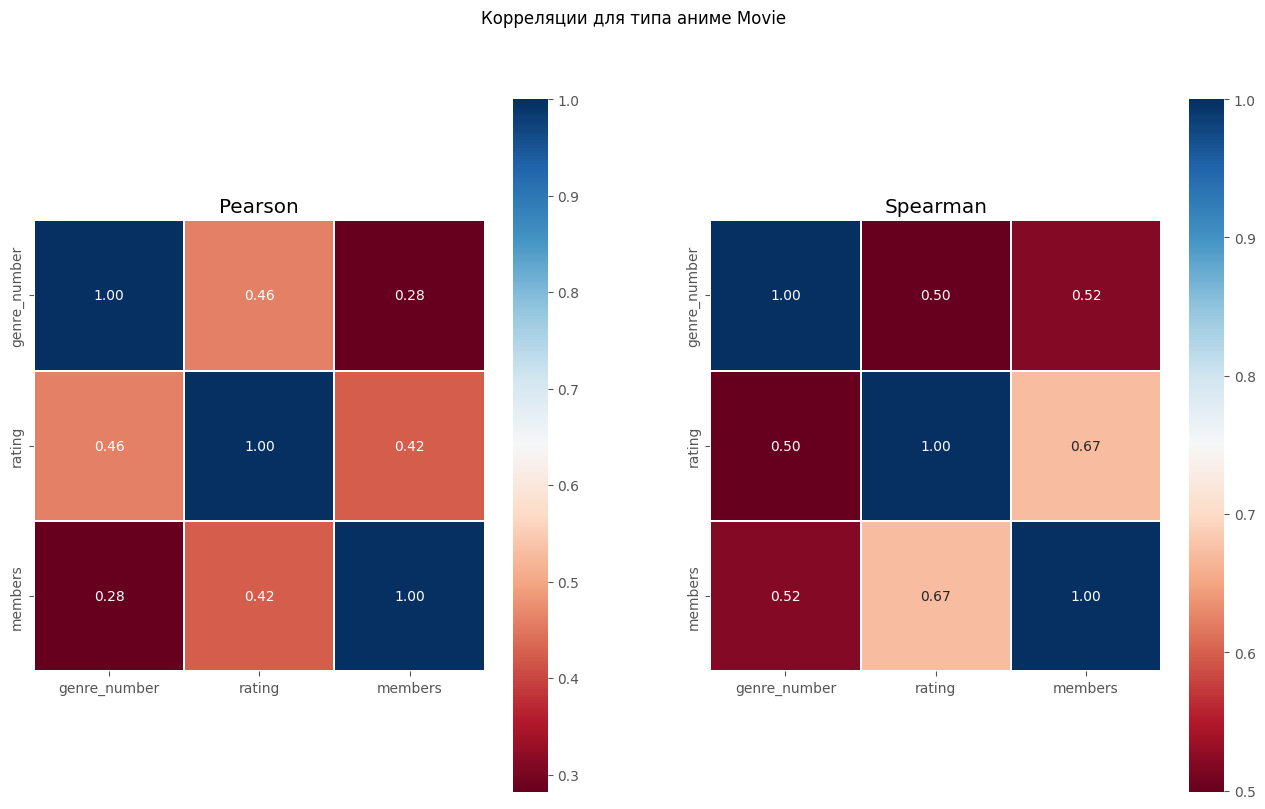

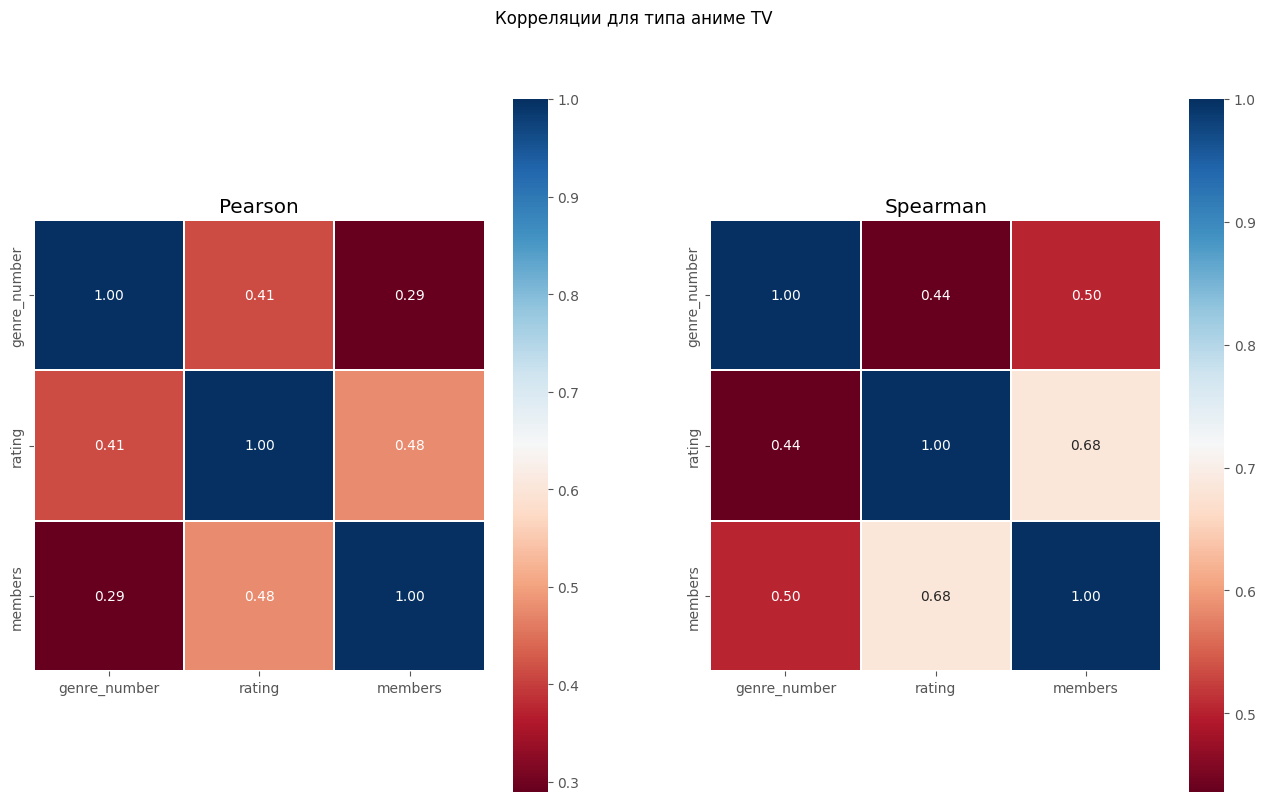

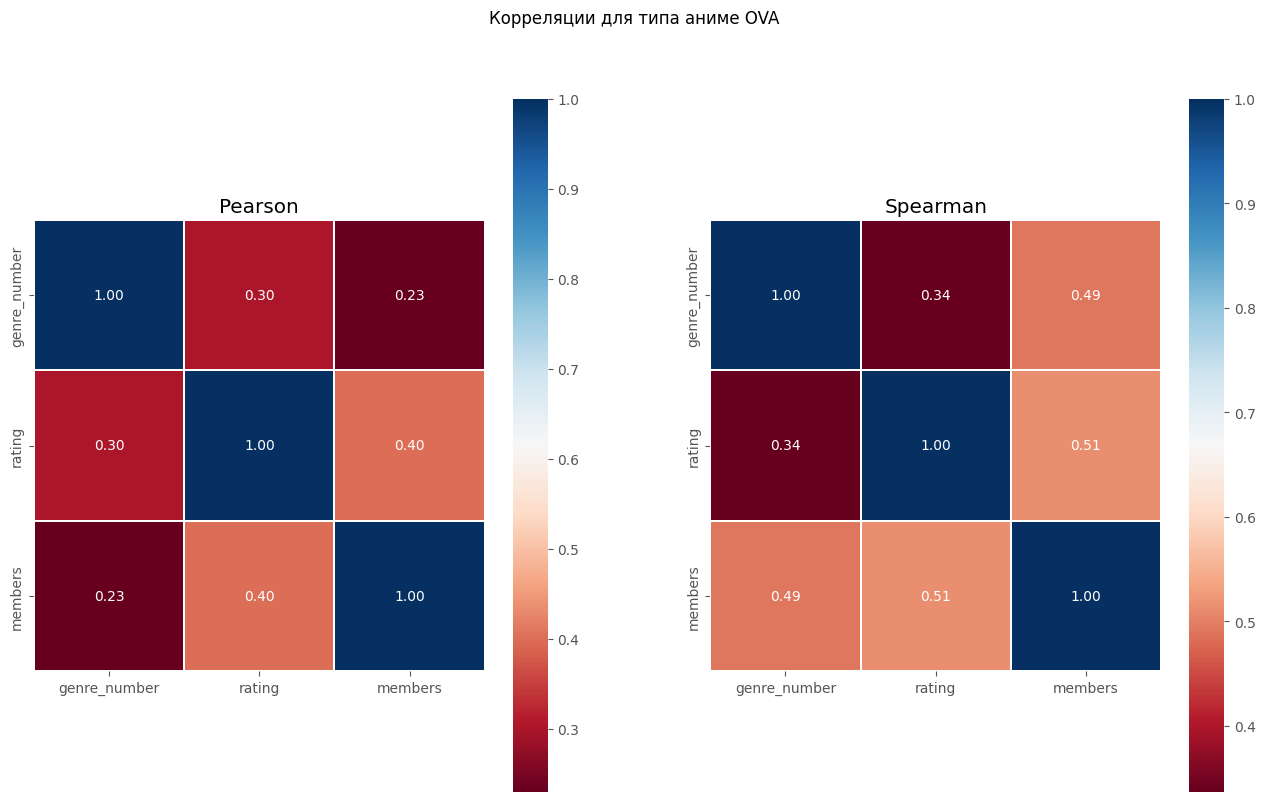

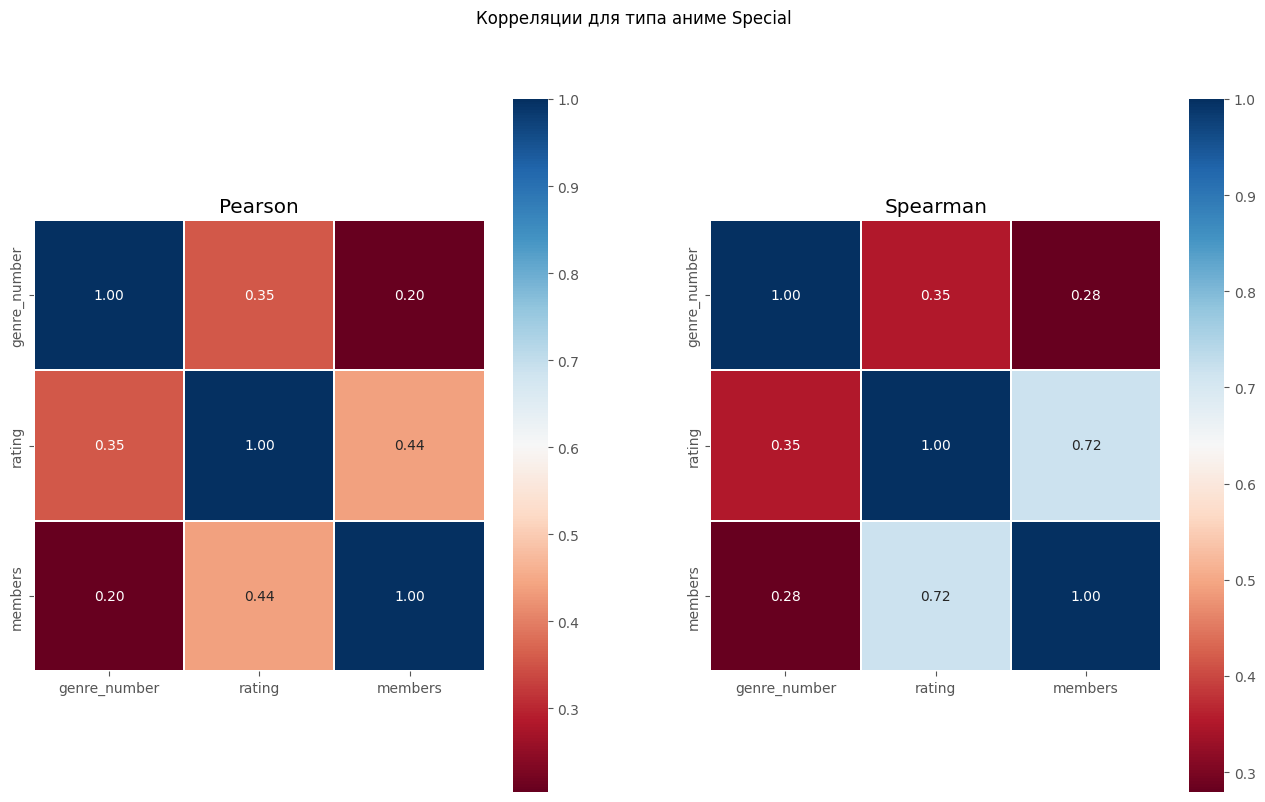

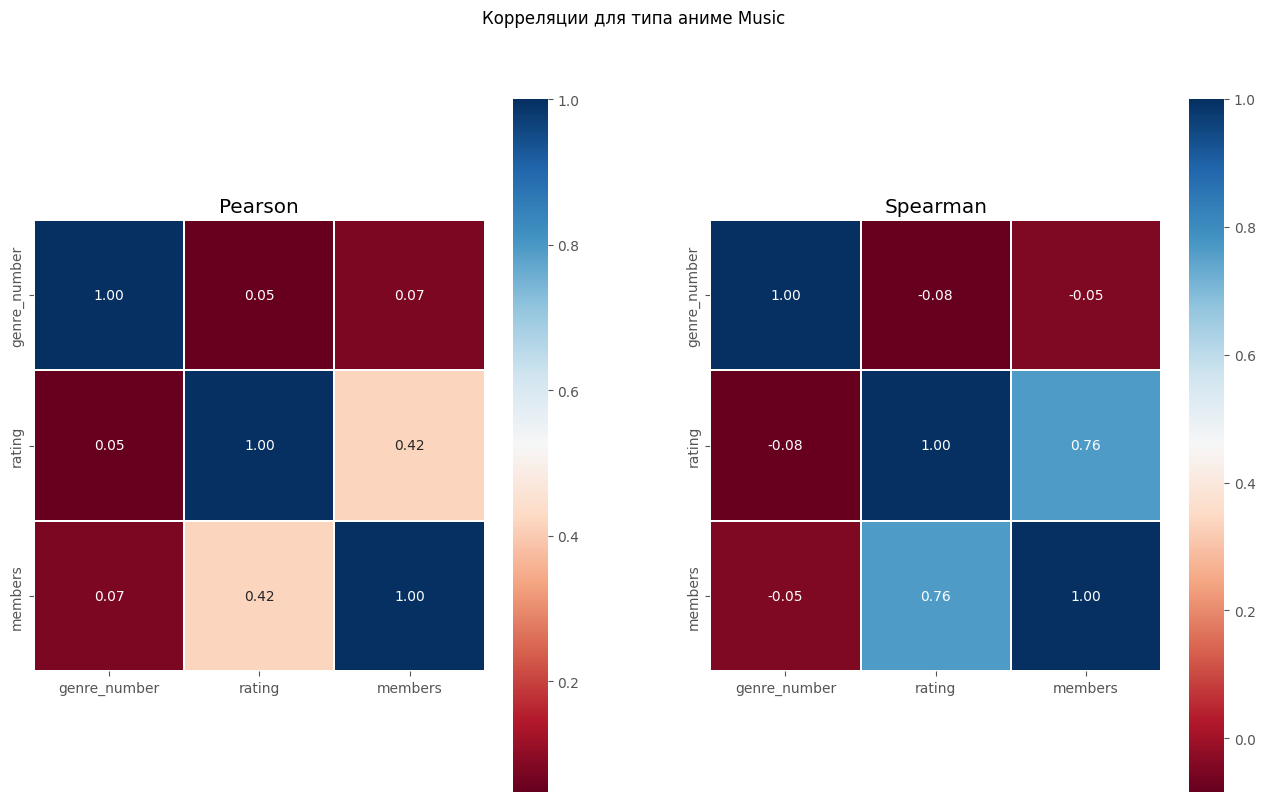

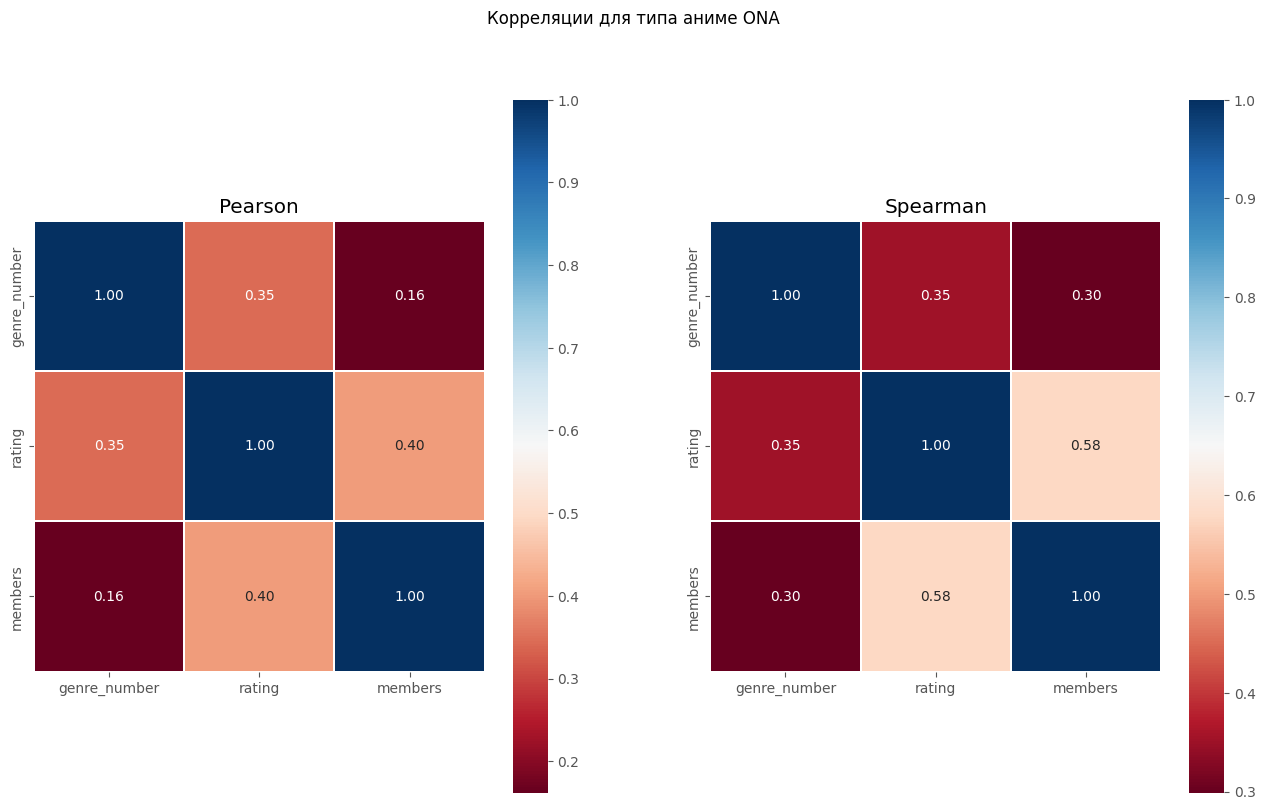

In [387]:
anime_types = genres_number_df['type'].dropna().unique()

for _type in anime_types:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
  fig.suptitle('Корреляции для типа аниме ' + _type)
  ax1 = sns.heatmap(genres_number_df[genres_number_df['type'] == _type][['genre_number', 'rating', 'members', 'type']].corr(method='pearson', numeric_only=True), ax=ax1, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
  ax1 = ax1.set_title('Pearson')
  ax2 = sns.heatmap(genres_number_df[genres_number_df['type'] == _type][['genre_number', 'rating', 'members', 'type']].corr(method='spearman', numeric_only=True), ax=ax2, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
  ax2 = ax2.set_title('Spearman')

plt.show()

## 10. Оцените и визуализируйте корреляцию длины названия аниме name с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)

Создадим датасет с необходимыми данными и новым признаком `name_len`:

In [388]:
name_len_df = df[['name', 'rating', 'episodes', 'members']]
name_len_df['genre_number'] = genres_number_df['genre_number']
name_len_df['name_len'] = name_len_df['name'].apply(lambda x: len(str(x)))
name_len_df.head()

<ipython-input-388-98e65defdeb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_len_df['genre_number'] = genres_number_df['genre_number']
<ipython-input-388-98e65defdeb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_len_df['name_len'] = name_len_df['name'].apply(lambda x: len(str(x)))


name  rating  episodes  members  genre_number  \
0                    Kimi no Na wa.    9.37         1   200630             4   
1  Fullmetal Alchemist: Brotherhood    9.26        64   793665             7   
2                          Gintama°    9.25        51   114262             7   
3                       Steins;Gate    9.17        24   673572             2   
4                     Gintama&#039;    9.16        51   151266             7   

   name_len  
0        14  
1        32  
2         8  
3        11  
4        13

Визуализируем:

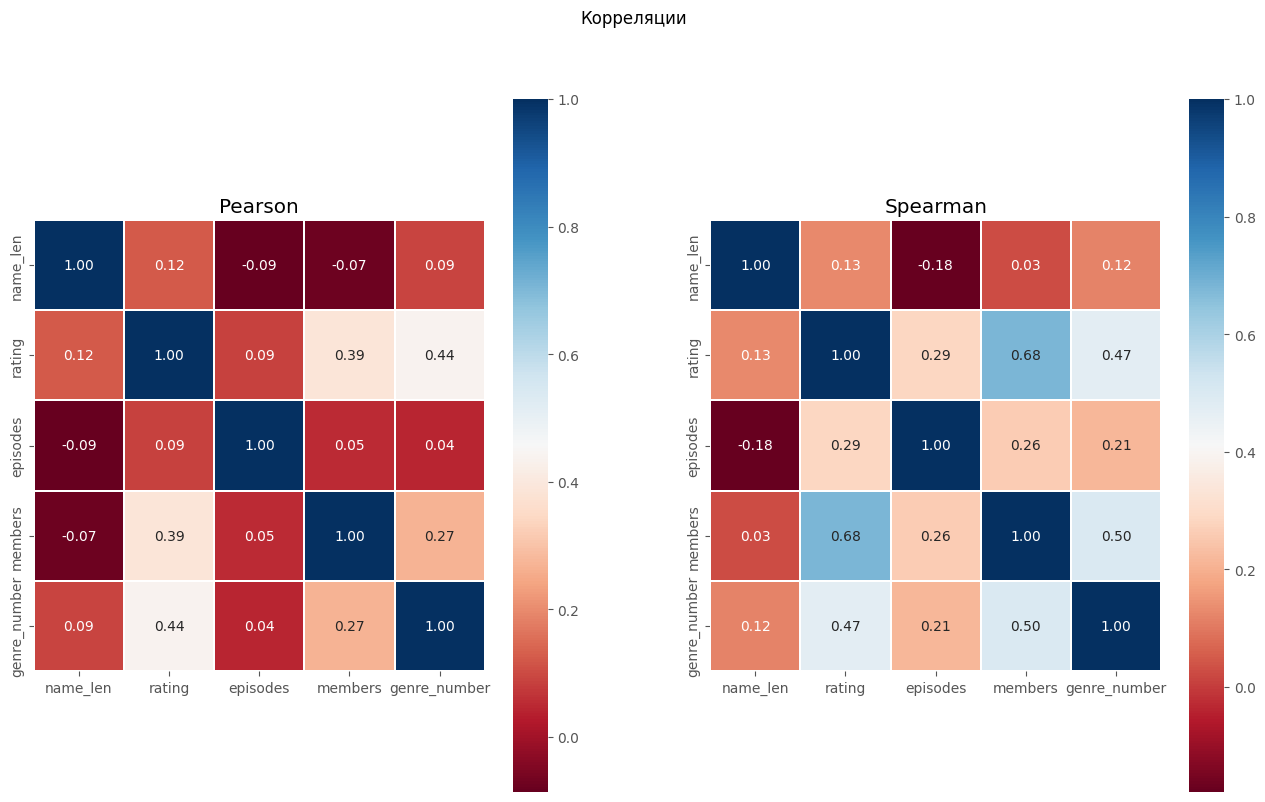

In [389]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle('Корреляции')
ax1 = sns.heatmap(name_len_df[['name_len', 'rating', 'episodes', 'members', 'genre_number']].corr(method='pearson', numeric_only=True), ax=ax1, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
ax1 = ax1.set_title('Pearson')
ax2 = sns.heatmap(name_len_df[['name_len', 'rating', 'episodes', 'members', 'genre_number']].corr(method='spearman', numeric_only=True), ax=ax2, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
ax2 = ax2.set_title('Spearman')

plt.show()

# 2. Часть

Каждое задание оценивается 1 баллом в случае полного выполнения

 ### Задание 11: Нормальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов с нормальным распределением, где среднее  μ=5 и стандартное отклонение σ=1.5.
Описательная статистика \
Рассчитайте выборочное среднее, выборочную медиану, выборочную моду и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими. \
Анализ отклонений \
Рассчитайте частоту значений, которые отклоняются от среднего на более чем одно стандартное отклонение, и сравните это с теоретическим результатом для нормального распределения.

Напишем функции поиска моды, подсчета статистик и визуализации распределения:

In [390]:
def get_mode(samples, bins):
  bin_list = np.zeros(bins)
  _min = np.min(samples)
  interval_length = (np.max(samples) - _min) / bins

  for sample in samples:
    bin_idx = int((sample - _min) // interval_length) if int((sample - _min) // interval_length) < bins else bins - 1
    bin_list[bin_idx] += 1

  max_bin_idx = max(range(len(bin_list)), key=lambda i: bin_list[i])
  max_bin_bottom = _min + (interval_length * max_bin_idx)
  return max_bin_bottom + interval_length / 2

In [391]:
def get_stats(samples, bins):
  return np.mean(samples), np.median(samples), get_mode(samples, bins), np.std(samples, ddof=1)

In [392]:
def get_plot(samples, ax, title):
  _mean, _median, _mode, _std = get_stats(samples, BINS)
  ax.axvline(_mean, color='k', linestyle='--', label=f'Среднее: {_mean:.2f}')
  ax.axvline(_median, color='blue', linestyle='-', label=f'Медиана: {_median:.2f}')
  ax.axvline(_mode, color='green', linestyle=':', label=f'Мода: {_mode:.2f}')
  sns.histplot(samples, ax=ax, bins=BINS)
  ax.set_ylabel('Количество значений')
  ax.set_title(title)
  ax.legend(loc='upper right')
  return ax

Визуализируем нормальное распределение:


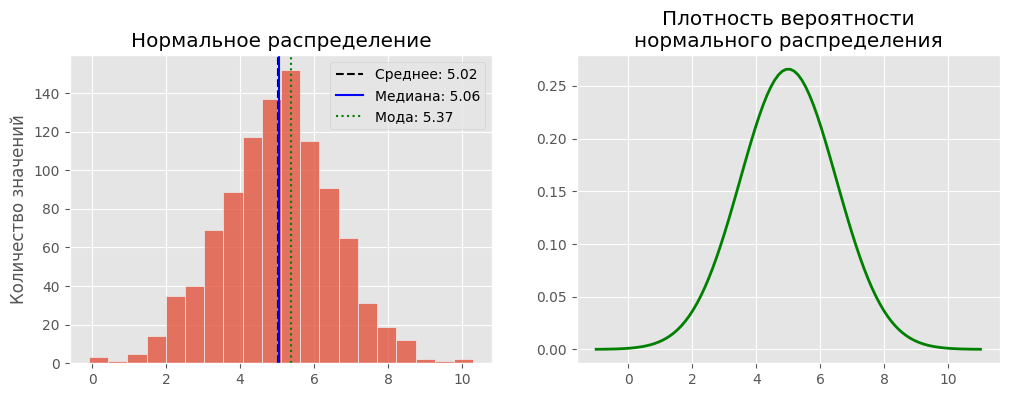

In [393]:
mu = 5
sigma = 1.5

norm_distr = st.norm(mu, sigma)
samples = norm_distr.rvs(size=1000, random_state=RANDOM_STATE)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
get_plot(samples, ax[0], 'Нормальное распределение')

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
ax[1].plot(x, norm_distr.pdf(x), color='green', linewidth=2)
ax[1].set_title('Плотность вероятности\nнормального распределения')
plt.show()

Графики сходятся. Сравним выборочные статистики с теоретическими:

In [394]:
norm_sample_mean, norm_sample_median, norm_sample_mode, norm_sample_std = get_stats(samples, BINS)

print(f'Теоретическое среднее: {mu}, выборочное: {norm_sample_mean:.4f}. Различие: {abs(1 - norm_sample_mean / mu):.4f}%')
print(f'Теоретическая медиана: {mu}, выборочная: {norm_sample_median:.4f}. Различие: {abs(1 - norm_sample_median / mu):.4f}%')
print(f'Теоретическая мода: {mu}, выборочная: {norm_sample_mode:.4f}. Различие: {abs(1 - norm_sample_mode / mu):.4f}%')
print(f'Теоретическое среднеквадратическое отклонение: {sigma}, выборочное: {norm_sample_std:.4f}. Различие: {abs(1 - norm_sample_std / sigma) * 100:.4f}%')

Теоретическое среднее: 5, выборочное: 5.0172. Различие: 0.0034%
Теоретическая медиана: 5, выборочная: 5.0597. Различие: 0.0119%
Теоретическая мода: 5, выборочная: 5.3660. Различие: 0.0732%
Теоретическое среднеквадратическое отклонение: 1.5, выборочное: 1.5136. Различие: 0.9055%


Рассчитаем частоту значений, которые отклоняются от среднего на более чем на одно стандартное отклонение, и сравним это с теоретическим результатом для нормального распределения.

In [395]:
# Рассчет теоретической вероятности
threshold = mu - sigma
p_theory = norm_distr.cdf(threshold) * 2

p_samples = len(samples[(samples > norm_sample_mean + norm_sample_std) | (samples < norm_sample_mean - norm_sample_std)]) / len(samples)
print(f'Теоретическая вероятность отклониться более чем на одно стандартное отклонение: {p_theory:.4f}, выборочная: {p_samples:.4f}. Различие: {abs(1 - p_samples / p_theory) * 100:.4f}%')

Теоретическая вероятность отклониться более чем на одно стандартное отклонение: 0.3173, выборочная: 0.3160. Различие: 0.4130%


### Задание 12: Экспоненциальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов из экспоненциального распределения с параметром λ=0.5. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. \
Анализ распределения \
Определите долю значений в выборке, которые больше двух выборочных средних, и сравните это с теоретической вероятностью для экспоненциального распределения. \

Визуализируем экспоненциальное распределение:


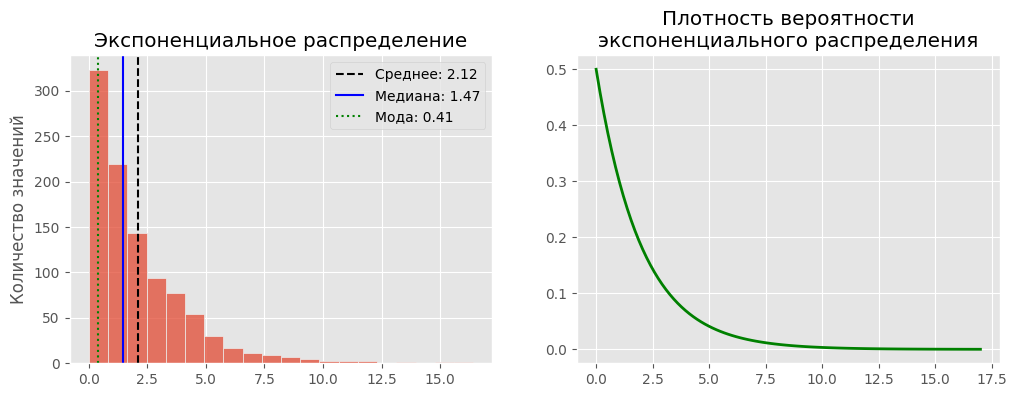

In [396]:
lam = 0.5

distr = st.expon(scale=1/lam)
samples = distr.rvs(size=1000, random_state=RANDOM_STATE)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
get_plot(samples, ax[0], 'Экспоненциальное распределение')

x = np.linspace(0, 17, 100)
ax[1].plot(x, distr.pdf(x), color='green', linewidth=2)
ax[1].set_title('Плотность вероятности\nэкспоненциального распределения')
plt.show()

Графики сходятся. Выгрузим статистики:

In [397]:
sample_mean, sample_median, sample_mode, sample_std = get_stats(samples, BINS)

print(f'Выборочное среднее: {sample_mean:.4f}')
print(f'Выборочная медиана: {sample_median:.4f}')
print(f'Выборочная мода: {sample_mode:.4f}')
print(f'Выборочное среднеквадратическое отклонение: {sample_std:.4f}')

Выборочное среднее: 2.1228
Выборочная медиана: 1.4695
Выборочная мода: 0.4145
Выборочное среднеквадратическое отклонение: 2.1162


Рассчитаем долю значений в выборке, которые больше двух выборочных средних, и сравним это с теоретическим результатом для экспоненциального распределения.

In [398]:
# Рассчет теоретической вероятности
threshold = 2 * sample_mean
p_theory = 1 - distr.cdf(threshold)

p_samples = len(samples[samples > threshold]) / len(samples)
print(f'Теоретическая вероятность значений быть больше двух выборочных средних: {p_theory:.4f}, выборочная: {p_samples:.4f}. Различие: {abs(1 - p_samples / p_theory) * 100:.4f}%')

Теоретическая вероятность значений быть больше двух выборочных средних: 0.1197, выборочная: 0.1350. Различие: 12.7862%



### Задание 13: Биномиальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из биномиального распределения с параметрами  n=10 и p=0.7 \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества успехов. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества успехов. \
Анализ вероятностей \
Вычислите вероятность того, что количество успехов будет больше 8, используя как выборочные данные, так и теоретическую вероятность биномиального распределения. Сравните результаты. \

Визуализируем биномиальное распределение:


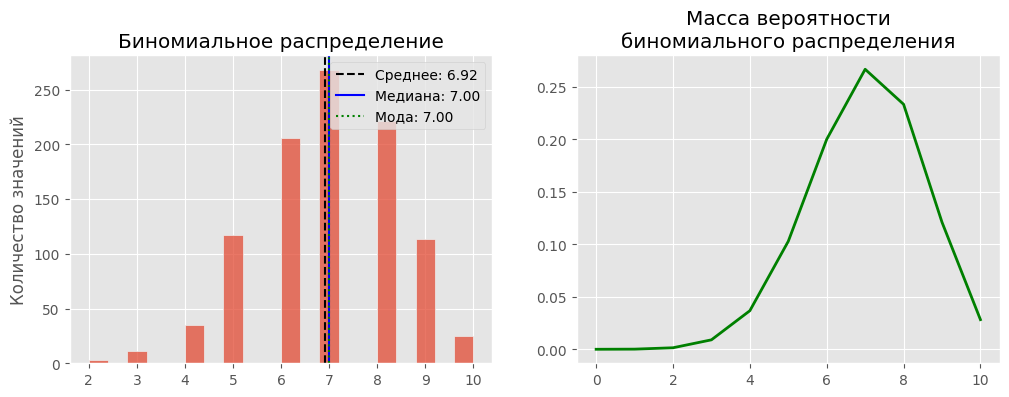

In [399]:
n = 10
p = 0.7

distr = st.binom(n, p)
samples = distr.rvs(size=1000, random_state=RANDOM_STATE)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
get_plot(samples, ax[0], 'Биномиальное распределение')

x = np.linspace(0, 10, 11)
ax[1].plot(x, distr.pmf(x), color='green', linewidth=2)
ax[1].set_title('Масса вероятности\nбиномиального распределения')
plt.show()

Графики сходятся. Выгрузим статистики:

In [400]:
sample_mean, sample_median, sample_mode, sample_std = get_stats(samples, BINS)

print(f'Выборочное среднее: {sample_mean:.4f}')
print(f'Выборочная медиана: {sample_median:.4f}')
print(f'Выборочная мода: {sample_mode:.4f}')
print(f'Выборочное среднеквадратическое отклонение: {sample_std:.4f}')

Выборочное среднее: 6.9200
Выборочная медиана: 7.0000
Выборочная мода: 7.0000
Выборочное среднеквадратическое отклонение: 1.4621


Рассчитаем вероятность того, что количество успехов будет больше 8, и сравним это с теоретическим результатом для биномиального распределения.

In [401]:
# Рассчет теоретической вероятности
threshold = 8
p_theory = 1 - distr.cdf(threshold)

p_samples = len(samples[samples > threshold]) / len(samples)
print(f'Теоретическая вероятность количества успехов быть больше 8: {p_theory:.4f}, выборочная: {p_samples:.4f}. Различие: {abs(1 - p_samples / p_theory) * 100:.4f}%')

Теоретическая вероятность количества успехов быть больше 8: 0.1493, выборочная: 0.1390. Различие: 6.9041%


### Задание 14: Геометрическое распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из геометрического распределения с вероятностью успеха p=0.3. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и моду количества попыток до первого успеха. \
Графическое представление \
Постройте гистограмму распределения количества попыток. \
Анализ вероятностей \
Определите вероятность того, что потребуется не более 5 попыток для первого успеха, используя как выборочные данные, так и теоретическое геометрическое распределение. Сравните результаты. \

Визуализируем геометрическое распределение:


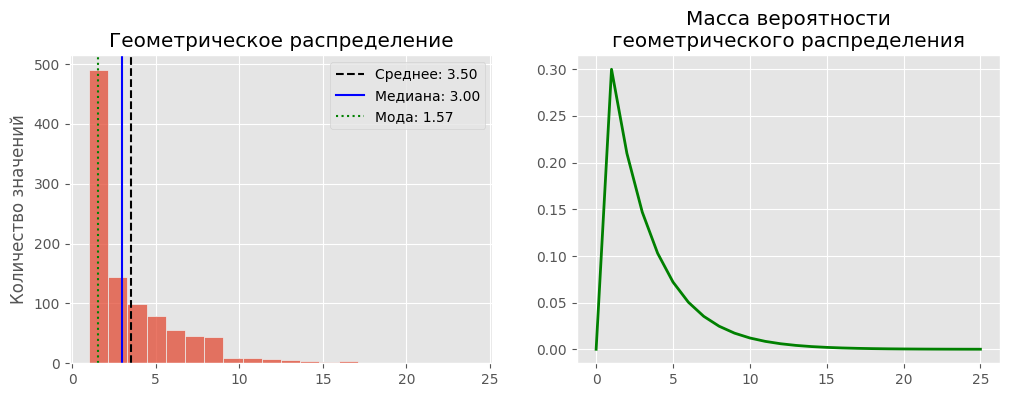

In [402]:
p = 0.3
distr = st.geom(p)
samples = distr.rvs(size=1000, random_state=RANDOM_STATE)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
get_plot(samples, ax[0], 'Геометрическое распределение')

x = np.linspace(0, 25, 26)
ax[1].plot(x, distr.pmf(x), color='green', linewidth=2)
ax[1].set_title('Масса вероятности\nгеометрического распределения')
plt.show()

Графики сходятся. Выгрузим статистики:

In [403]:
sample_mean, sample_median, sample_mode, sample_std = get_stats(samples, BINS)

print(f'Выборочное среднее: {sample_mean:.4f}')
print(f'Выборочная медиана: {sample_median:.4f}')
print(f'Выборочная мода: {sample_mode:.4f}')
print(f'Выборочное среднеквадратическое отклонение: {sample_std:.4f}')

Выборочное среднее: 3.4990
Выборочная медиана: 3.0000
Выборочная мода: 1.5750
Выборочное среднеквадратическое отклонение: 2.9538


Рассчитаем вероятность того, что потребуется не более 5 попыток для первого успеха, и сравним это с теоретическим результатом для геометрического распределения.

In [404]:
# Рассчет теоретической вероятности
threshold = 5
p_theory = distr.cdf(threshold - 1)

p_samples = len(samples[samples < threshold]) / len(samples)
print(f'Теоретическая вероятность того, что потребуется не более 5 попыток для первого успеха: {p_theory:.4f}, выборочная: {p_samples:.4f}. Различие: {abs(1 - p_samples / p_theory) * 100:.4f}%')

Теоретическая вероятность того, что потребуется не более 5 попыток для первого успеха: 0.7599, выборочная: 0.7330. Различие: 3.5399%


### Задание 15: Равномерное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из равномерного распределения на отрезке от 3 до 7. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление  \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими значениями для равномерного распределения.
Анализ крайних значений \
Определите долю значений, которые находятся ближе к границам распределения (например, больше 6 или меньше 4), и сравните с ожидаемым результатом для равномерного распределения. \

Визуализируем равномерное распределение:


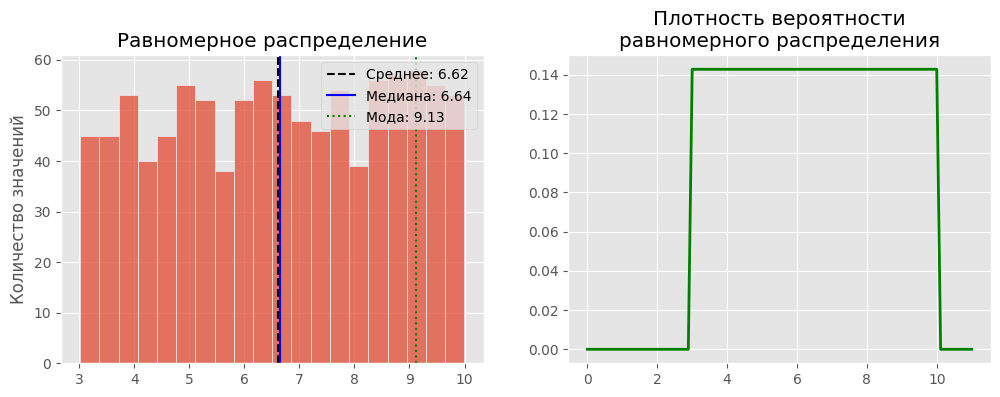

In [405]:
a = 3
b = 7

distr = st.uniform(a, b)
samples = distr.rvs(size=1000, random_state=RANDOM_STATE)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
get_plot(samples, ax[0], 'Равномерное распределение')

x = np.linspace(0, 11, 100)
ax[1].plot(x, distr.pdf(x), color='green', linewidth=2)
ax[1].set_title('Плотность вероятности\nравномерного распределения')
plt.show()

Графики сходятся. Выгрузим статистики:

In [406]:
sample_mean, sample_median, sample_mode, sample_std = get_stats(samples, BINS)

print(f'Выборочное среднее: {sample_mean:.4f}')
print(f'Выборочная медиана: {sample_median:.4f}')
print(f'Выборочная мода: {sample_mode:.4f}')
print(f'Выборочное среднеквадратическое отклонение: {sample_std:.4f}')

Выборочное среднее: 6.6198
Выборочная медиана: 6.6426
Выборочная мода: 9.1252
Выборочное среднеквадратическое отклонение: 2.0256


Рассчитаем долю значений, которые находятся ближе к границам распределения (больше 6 или меньше 4), и сравним это с теоретическим результатом для равномерного распределения.

In [407]:
# Рассчет теоретической вероятности
threshold_bottom = 4
threshold_top = 6
p_theory = distr.cdf(threshold_bottom) + (1 - distr.cdf(threshold_top))

p_samples = len(samples[(samples < threshold_bottom) | (samples > threshold_top)]) / len(samples)
print(f'Теоретическая доля значений, которые находятся ближе к границам распределения (больше 6 или меньше 4): {p_theory:.4f}, выборочная: {p_samples:.4f}. Различие: {abs(1 - p_samples / p_theory) * 100:.4f}%')

Теоретическая доля значений, которые находятся ближе к границам распределения (больше 6 или меньше 4): 0.7143, выборочная: 0.7220. Различие: 1.0800%


### Задание 16: Распределение Пуассона (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из распределения Пуассона с параметром  λ=4. \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества событий. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества событий. \
Анализ вероятностей \
Определите вероятность того, что количество событий будет меньше 3, используя как выборочные данные, так и теоретическое распределение Пуассона. Сравните результаты. \

Визуализируем равномерное распределение:


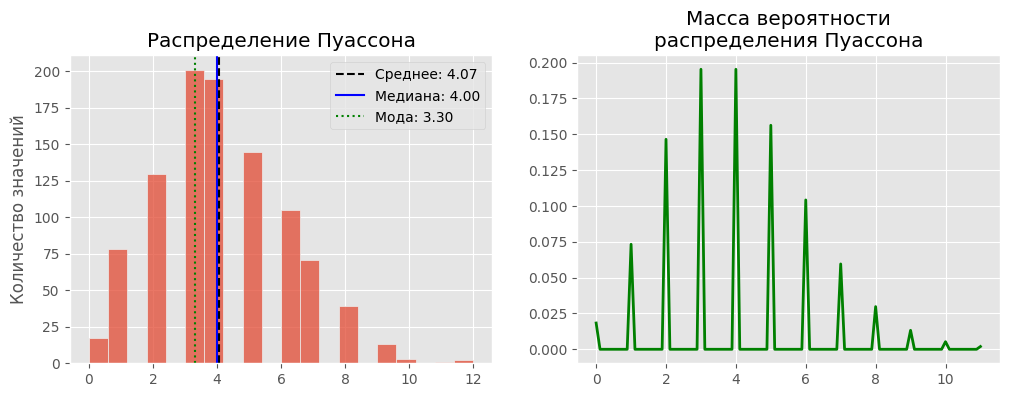

In [408]:
lam = 4
distr = st.poisson(lam)
samples = distr.rvs(size=1000, random_state=RANDOM_STATE)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
get_plot(samples, ax[0], 'Распределение Пуассона')

x = np.linspace(0, 11, 100)
ax[1].plot(x, distr.pmf(x), color='green', linewidth=2)
ax[1].set_title('Масса вероятности\nраспределения Пуассона')
plt.show()

Графики сходятся. Выгрузим статистики:

In [409]:
sample_mean, sample_median, sample_mode, sample_std = get_stats(samples, BINS)

print(f'Выборочное среднее: {sample_mean:.4f}')
print(f'Выборочная медиана: {sample_median:.4f}')
print(f'Выборочная мода: {sample_mode:.4f}')
print(f'Выборочное среднеквадратическое отклонение: {sample_std:.4f}')

Выборочное среднее: 4.0670
Выборочная медиана: 4.0000
Выборочная мода: 3.3000
Выборочное среднеквадратическое отклонение: 2.0329


Рассчитаем вероятность того, что количество событий будет меньше 3, и сравним это с теоретическим результатом для распределения Пуассона.

In [410]:
# Рассчет теоретической вероятности
threshold = 3
p_theory = distr.cdf(threshold - 1)

p_samples = len(samples[(samples < threshold)]) / len(samples)
print(f'Теоретическая вероятность того, что количество событий будет меньше 3: {p_theory:.4f}, выборочная: {p_samples:.4f}. Различие: {abs(1 - p_samples / p_theory) * 100:.4f}%')

Теоретическая вероятность того, что количество событий будет меньше 3: 0.2381, выборочная: 0.2250. Различие: 5.5032%


# 3 Часть

Соберем данные о рейтинге из исходного датасета:

In [411]:
data = df['rating'].dropna().to_numpy()
data

array([9.37, 9.26, 9.25, ..., 5.83, 6.13, 7.  ])

Напишем общие функции для вывода графиков и получения статистик. К заданиям под номером 1:

In [412]:
def apply_or_ddof(data, aggfunc):
  if (aggfunc == np.var or aggfunc == np.std):
    return aggfunc(data, ddof=1)

  return aggfunc(data)

К заданиям под номером 2:

In [413]:
def get_sample_aggregations(data, aggfunc, samples_count, n):
  aggs = []
  for _ in range(samples_count):
      samples = np.random.choice(a=data, size=n, replace=True)
      aggs.append(apply_or_ddof(samples, aggfunc))
  return aggs

In [414]:
def get_agg_samples_hist(data, aggfunc, samples_count, n, ax, title):
  aggs = get_sample_aggregations(data, aggfunc, samples_count, n)
  return get_plot(aggs, ax, title)

In [415]:
def get_agg_samples_stats(data, aggfunc, samples_count, n):
  aggs = get_sample_aggregations(data, aggfunc, samples_count, n)
  return get_stats(aggs, BINS)

К заданиям под номером 3:

In [416]:
def get_agg_samples_disp_plot(data, aggfunc, samples_count, n_list, ax, title):
  aggs = []
  for n in n_list:
    disp = get_agg_samples_stats(data, aggfunc, samples_count, n)[3] ** 2
    aggs.append(disp)
  sns.lineplot(x=n_list, y=aggs, ax=ax)
  plt.title(title)
  plt.xlabel('Объем выборки')
  plt.ylabel('Дисперсия')
  return ax

## Задание 17: Проверка несмещённости и состоятельности выборочного среднего рейтингов (3 балла все задание)
1. Вычисление генерального среднего рейтингов \
Рассчитайте выборочное среднее рейтингов всех аниме. \
2. Проверка несмещённости оценки выборочного среднего \
Сгенерируйте 1000 выборок объёма n=100 с возвращением из исходных данных.
Для каждой выборки вычислите выборочное среднее рейтингов.
Постройте гистограмму распределения полученных выборочных средних.
Вычислите среднее из выборочных средних и сравните его с генеральным средним исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочного среднего. \
Повторите шаги из пункта 2 для различных объёмов выборки: n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию выборочных средних.
Постройте график зависимости дисперсии выборочных средних от объёма выборки.
Проанализируйте, как дисперсия уменьшается с увеличением объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

1. Рассчитаем выборочное среднее рейтингов всех аниме.

In [417]:
func = np.mean
gen_agg = apply_or_ddof(data, func)

print(f'Выборочное среднее рейтингов всех аниме: {gen_agg:.2f}')

Выборочное среднее рейтингов всех аниме: 6.49


2. Проверим несмещённость оценки выборочного среднего.

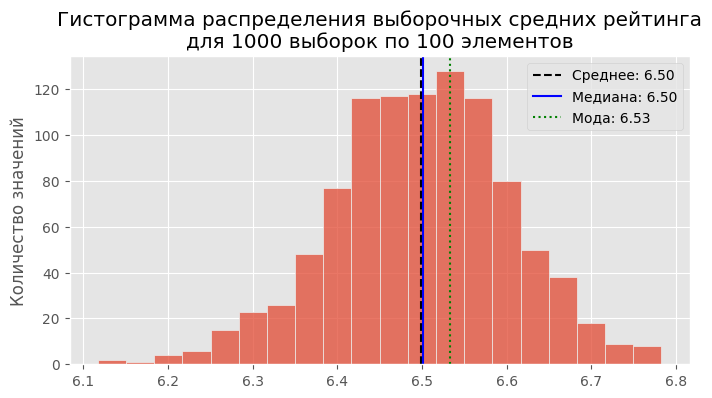

In [418]:
samples_count = 1000
n = 100
title = f'Гистограмма распределения выборочных средних рейтинга\nдля {samples_count} выборок по {n} элементов'

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
get_agg_samples_hist(data, func, samples_count, n, ax, title)
plt.show()

Посчитаем среднее для выборочных средних и оценим его отклонение от генерального среднего:

In [419]:
sample_agg_mean = get_agg_samples_stats(data, func, samples_count, n)[0]
print(f'Среднее для выборочных средних рейтинга равно {sample_agg_mean:.4f}, что отличается от генерального среднего на {abs(1 - sample_agg_mean / gen_agg) * 100:.4f}%')

Среднее для выборочных средних рейтинга равно 6.4955, что отличается от генерального среднего на 0.0254%


Отклонение достаточно мало, поэтому оценку можно назвать **несмещенной**.

3. Проверим состоятельность оценки выборочного среднего.

Построим гистограммы распределения выборочных средних для разных значений `n`:

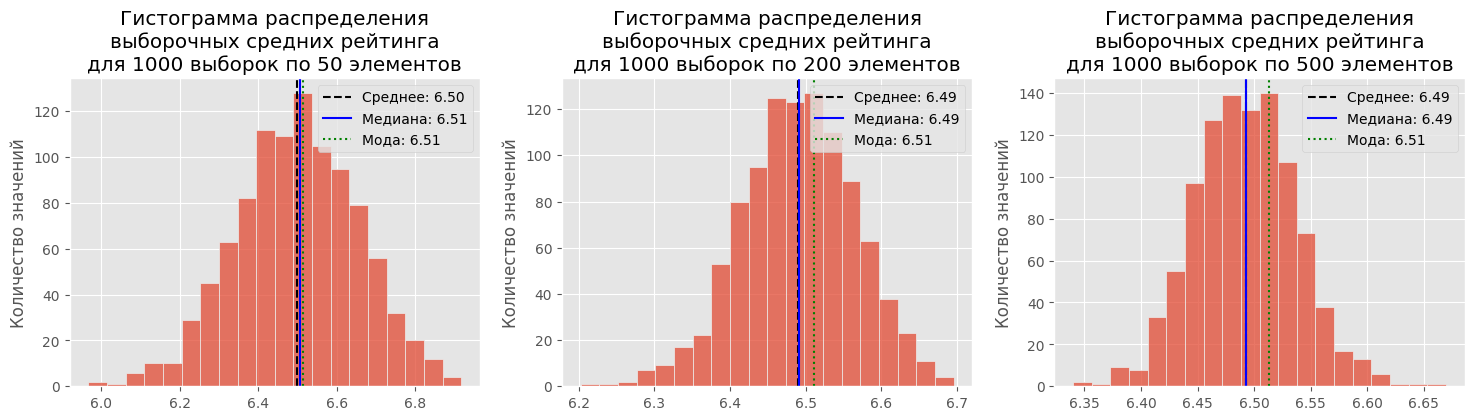

In [420]:
samples_count = 1000
n_list = [50, 200, 500]
fig, ax = plt.subplots(1, len(n_list), figsize=(len(n_list) * 6, 4))

for i in range(len(n_list)):
  n = n_list[i]
  title = f'Гистограмма распределения\nвыборочных средних рейтинга\nдля {samples_count} выборок по {n} элементов'
  get_agg_samples_hist(data, func, samples_count, n, ax[i], title)

plt.show()

Построим график зависимости дисперсии выборочных средних от объема выборки:

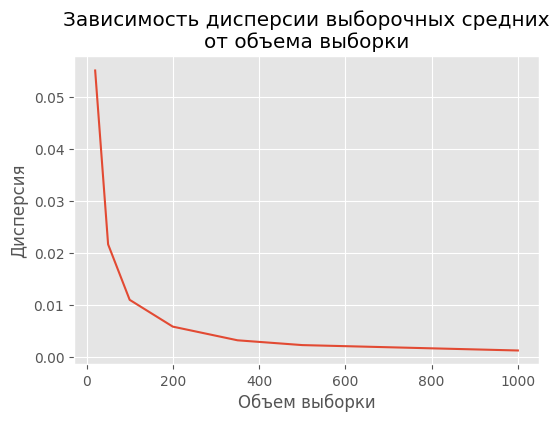

In [421]:
n_list = [20, 50, 100, 200, 350, 500, 1000]

title = 'Зависимость дисперсии выборочных средних\nот объема выборки'
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

get_agg_samples_disp_plot(data, func, samples_count, n_list, ax, title)
plt.show()

Видим, что при увеличении размера выборки дисперсия стремится к нулю, а значит, оценка является **состоятельной**.

## Задание 18: Проверка несмещённости и состоятельности медианы рейтингов (3 балла все задание)
1. Вычисление генеральной медианы \
Рассчитайте медиану рейтингов по всему датасету.
2. Проверка несмещённости медианы \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите медиану рейтингов.
Постройте гистограмму распределения полученных медиан.
Вычислите среднее из медиан и сравните с медианой исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности медианы \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите стандартное отклонение медиан.
Постройте график зависимости стандартного отклонения медиан от объёма выборки.
Проанализируйте изменение разброса медиан с ростом объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

1. Рассчитаем выборочную медиану рейтингов всех аниме.

In [422]:
func = np.median
gen_agg = apply_or_ddof(data, func)

print(f'Выборочная медиана рейтингов всех аниме: {gen_agg:.2f}')

Выборочная медиана рейтингов всех аниме: 6.60


2. Проверим несмещённость оценки выборочной медианы.

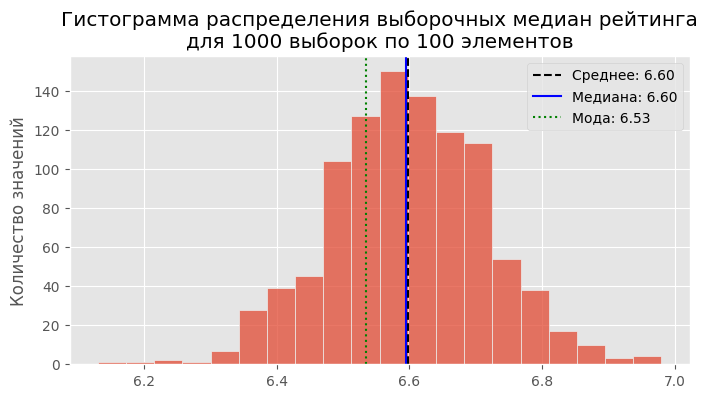

In [423]:
samples_count = 1000
n = 100
title = f'Гистограмма распределения выборочных медиан рейтинга\nдля {samples_count} выборок по {n} элементов'

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
get_agg_samples_hist(data, func, samples_count, n, ax, title)
plt.show()

Посчитаем среднее для выборочных медиан и оценим его отклонение от генеральной медианы:

In [424]:
sample_agg_mean = get_agg_samples_stats(data, func, samples_count, n)[0]
print(f'Среднее для выборочных медиан рейтинга равно {sample_agg_mean:.4f}, что отличается от генеральной медианы на {abs(1 - sample_agg_mean / gen_agg) * 100:.4f}%')

Среднее для выборочных медиан рейтинга равно 6.5983, что отличается от генеральной медианы на 0.0256%


Отклонение достаточно мало, поэтому оценку можно назвать **несмещенной**.

3. Проверим состоятельность оценки выборочной медианы.

Построим гистограммы распределения выборочных медиан для разных значений `n`:

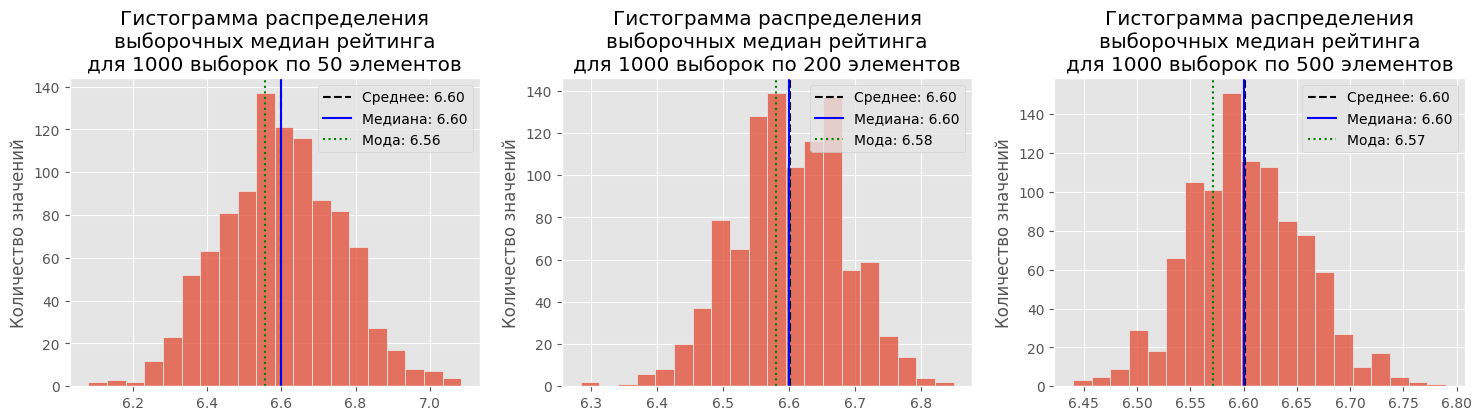

In [425]:
samples_count = 1000
n_list = [50, 200, 500]
fig, ax = plt.subplots(1, len(n_list), figsize=(len(n_list) * 6, 4))

for i in range(len(n_list)):
  n = n_list[i]
  title = f'Гистограмма распределения\nвыборочных медиан рейтинга\nдля {samples_count} выборок по {n} элементов'
  get_agg_samples_hist(data, func, samples_count, n, ax[i], title)

plt.show()

Построим график зависимости дисперсии выборочных медиан от объема выборки:

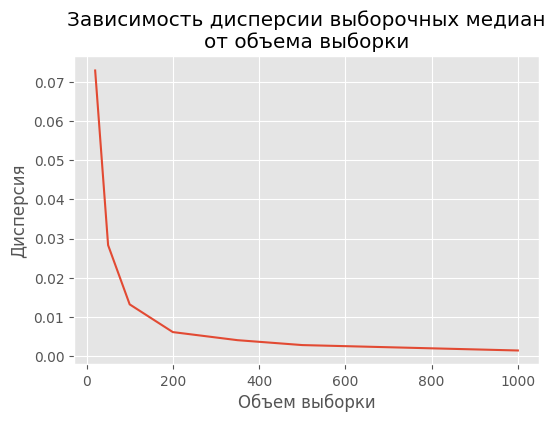

In [426]:
n_list = [20, 50, 100, 200, 350, 500, 1000]

title = 'Зависимость дисперсии выборочных медиан\nот объема выборки'
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

get_agg_samples_disp_plot(data, func, samples_count, n_list, ax, title)
plt.show()

Видим, что при увеличении размера выборки дисперсия стремится к нулю, а значит, оценка является **состоятельной**.

## Задание 19: Проверка несмещённости и состоятельности выборочной дисперсии рейтингов (3 балла все задание)
1. Вычисление выборочной дисперсии \
Рассчитайте выборочную дисперсию рейтингов по всему датасету.
2. Проверка несмещённости оценки выборочной дисперсии \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите выборочную дисперсию.
Постройте гистограмму распределения полученных дисперсий.
Вычислите среднее из дисперсий и сравните с выборочной дисперсией исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочной дисперсии \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию оценок выборочной дисперсии.
Постройте график зависимости дисперсии оценок выборочной дисперсии от объёма выборки.
Проанализируйте изменение разброса оценок с ростом объёма выборки.  Сделайте вывод о состоятельности оценки. (1 балл)

1. Рассчитаем выборочную дисперсию рейтингов всех аниме.

In [427]:
func = np.var
gen_agg = apply_or_ddof(data, func)

print(f'Выборочная дисперсия рейтингов всех аниме: {gen_agg:.2f}')

Выборочная дисперсия рейтингов всех аниме: 1.14


2. Проверим дисперсию оценки выборочной медианы.

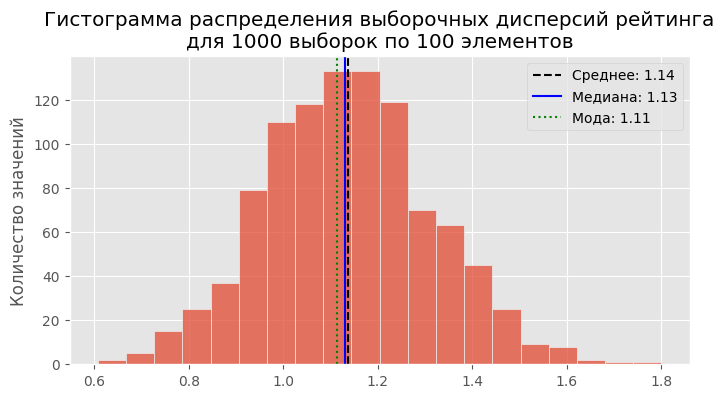

In [428]:
samples_count = 1000
n = 100
title = f'Гистограмма распределения выборочных дисперсий рейтинга\nдля {samples_count} выборок по {n} элементов'

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
get_agg_samples_hist(data, func, samples_count, n, ax, title)
plt.show()

Посчитаем среднее для выборочных дисперсий и оценим его отклонение от генеральной дисперсии:

In [429]:
sample_agg_mean = get_agg_samples_stats(data, func, samples_count, n)[0]
print(f'Среднее для выборочных дисперсий рейтинга равно {sample_agg_mean:.4f}, что отличается от генеральной дисперсии на {abs(1 - sample_agg_mean / gen_agg) * 100:.4f}%')

Среднее для выборочных дисперсий рейтинга равно 1.1347, что отличается от генеральной дисперсии на 0.2460%


Отклонение достаточно мало, поэтому оценку можно назвать **несмещенной**.

3. Проверим состоятельность оценки выборочной дисперсии.

Построим гистограммы распределения выборочных дисперсий для разных значений `n`:

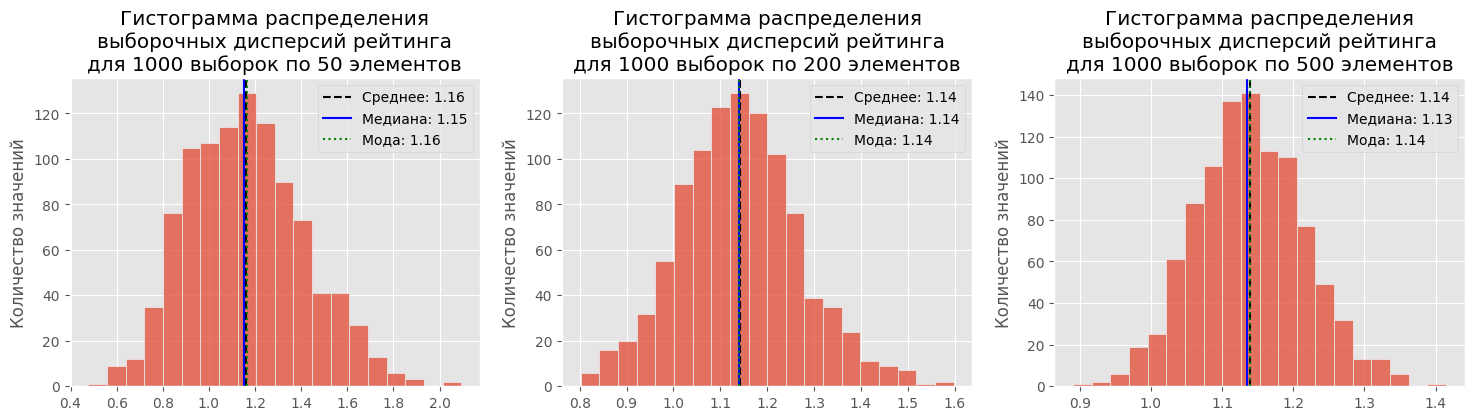

In [430]:
samples_count = 1000
n_list = [50, 200, 500]
fig, ax = plt.subplots(1, len(n_list), figsize=(len(n_list) * 6, 4))

for i in range(len(n_list)):
  n = n_list[i]
  title = f'Гистограмма распределения\nвыборочных дисперсий рейтинга\nдля {samples_count} выборок по {n} элементов'
  get_agg_samples_hist(data, func, samples_count, n, ax[i], title)

plt.show()

Построим график зависимости дисперсии выборочных дисперсий от объема выборки:

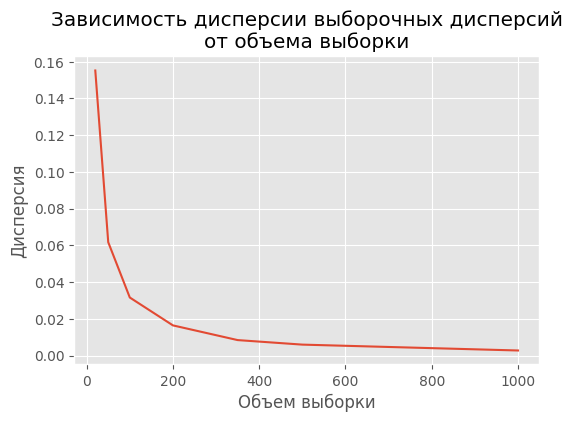

In [431]:
n_list = [20, 50, 100, 200, 350, 500, 1000]

title = 'Зависимость дисперсии выборочных дисперсий\nот объема выборки'
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

get_agg_samples_disp_plot(data, func, samples_count, n_list, ax, title)
plt.show()

Видим, что при увеличении размера выборки дисперсия стремится к нулю, а значит, оценка является **состоятельной**.